# DS 3001: Foundations of Machine Learning
## Project 1: An Analysis on Attitudes towards Health-Related Internet Usage

---
**Group 2: brc4ega, zzb2rf, eqk9vb, akl5mjz, wvu9cs, ryp6vw, brr2tu**

**Authors: Bryant Chow, Elaine Zhang, Cheryl Bai, Ashley Luk, Eric Nguyen, Adam Chow, Hieu Vu**

- *Any questions regarding this report should be directed to these authors.*
---

## Research Question
**Selected Question**
*************

*How do attitudes towards health-related internet usage vary among different demographic groups (age, location, education, race, etc.)?*

*********

**Question Ideas:**

*Team members have each submitted two (2) project proposal topics. After discussing the implications of each question based on relevant societal events, a research question was selected (bolded).*

[Data Explorer](https://gssdataexplorer.norc.org/variables/vfilter)

- What affects happiness in marriage? Salary, household income, type of job, anything related to husband status
- How does parental status (job status, salary, marriage/divorce) affect degree that a person receives/how far they go in education?
- What role does geographic location play in shaping attitudes and behaviors related to climate change?
- How does the perception of work-life balance vary among different professions, and what factors contribute to this variation?
- **How do attitudes towards health-related internet usage vary among different demographic groups (age, location, education, race, etc.)?**
- Are there any trends between attitudes in health (physical and mental) and attitudes towards children?
- Are there any trends between zodiac signs and their attitudes towards the government?
- How did economic downturn affect the individuals of the survey? For example, during 2008's housing crisis, were there more divorces shortly after? Are there changes to mental health? What was the overall job status change? This could also be applied to 2020.
- What are the the most common profession routes for self employment? How did these individuals fare overtime?
- How does the state of the economy/social events affect familial trends?
- How has education curriculum changed in response to societal events?

## Initial Data Setup

---

### 1. Variable Definitions
*In this section, variables have been meticulously selected in order to support the research of the project. Variables have been included below with a brief description of what they measure and why they were selected/questions asks that prompted adding these variables to the report.*

*If a variable's name was changed during the cleaning process, the updated name was included in this section for reader convenience. Newer variable names have been given to make understandability much easier.*

---
TODO: Eric: Finish why selected


- **year**: GSS year for this respondent
  - Year was selected in order to track other variables over a period of time. It is an excellent variable to leverage when it comes time to create data visualizations.
- **race**: race of respondent
  - Race was selected in order to get a better understanding of the respondents' characteristics (demographics). Group 2 reasoned it would be relevant to research if attitudes varied between races.
- **age**: age of respondent
  - Age was selected in order to get a beter understanding of the respondents' characteristics (demographics). With the recent introduction of the internet, it's clear that different generations have certain views towards the internet. Age is an excellent variable to find these differences between GenZ and Millenials, for example.
- **sex**: sex of respondent
  - Sex was selected in order to get a beter understanding of the respondents' characteristics (demographics). Perhaps men view the internet differently in comparison to women?
- **degree**: highest degree earned by respondent
  - Degree was selected in order to get a beter understanding of the respondents' characteristics (demographics). Group 2 reasoned that having an education may affect views towards internet usage.
- **rincome**: respondent's income
  - Rincome was selected in order to get a beter understanding of the respondents' characteristics (demographics). Is there a general attitude consensus from wealthier people versus poorer people?
  - **rincome** renamed to **respondent_income**
- **income**: total family income
  - Income was selected for the same reason as rincome.
  - **income** renamed to **family_income**
- **rweight**: how much does the respondent weigh
  - Rweight was selected in order to get a beter understanding of the respondents' characteristics (demographics). Does weight and internet usage have an affect on one's self esteem? This question relates to the project and is a commonly researched question among teenagers.
  - **rweight** renamed to **weight**
- **relig**: respondent's religious preferences
  - Relig was selected in order to get a beter understanding of the respondents' characteristics (demographics). Amish people do not use technology, so do their views differ than the average respondent? Do other religions have similar behaviors that would affect their attitude?
  - **relig** renamed to **religion**
- **health**: condition of health
  - Health was selected in order to get a beter understanding of the respondents' characteristics (demographics). Do healthier people spend as much time on social media?
- **marital**: marital status
  - Marital was selected in order to get a beter understanding of the respondents' characteristics (demographics). How strong is the correlation between marrital status versus internet usage attitudes?
- **wwwhr**: not counting email, hours per week spent on the internet
  - For respondents that spend lots of time on the internet, what are their attitudes?
  - **wwwhr** renamed to **internet_hours_per_week**
- **compuse**: do you ever use a computer at work or home?
  - Is there a correlation between having a computer versus positive attitudes towards internet usage?
  - **compuse** renamed to **computer_use**
- **webmob**: do you access internet through mobile device
  - With an increase in mobile devices, how have attitudes changed towards internet usage especially in the last 10 years? Group 2 wants to analyze if there are any trends with attitudes and a growing number of people with mobile devices with access to the internet.
  - **webmob** renamed to **mobile_access**
- **health30** (2000-2004): In the past 30 days, how often have you visited a web site for? Health and fitness?
  - This variable was selected because it allows Group 2 to analyze whether respondents access health/fitness materials online. This prompted many questions that helped Group 2 narrow down their question: do respondents trust online health/fitness advice? Do respondents actively use these sources on a routine basis? Etc.
  - **health30** renamed to **web_health_visit_frequency**
- **health12**(2000-2002): have you used the web for health information in past 12 months?
  - This variable was selected for similar reasons as health30. However, this variable contains information over the course of a year.
  - **health12** renamed to **used_health_web**
- **hlthwblif** (2022): During the past 12 months how often have you used the internet to look for info on healthy lifestyle?
  - This variable was selected as it narrows down what respondents used the internet for. Numerical variables like this can make interesting data visualizations plots.
  - **hlthwblif** renamed to **healthy_lifestyle_visit_frequency**
- **hlthwbanx** (2022): How often in the past 12 months have you searched on the internet information related to anxiety/stress?
  - This variable was selected for similar reasons as health30. It allows Group 2 to get a better insight on whether respondents trust online health advice.
  - **hlthwbanx** renamed to **anxiety_visit_frequency**
- **evmhp** (1996): respondents have ever had a mental health problem? yes or no
  - Evmhp was selected in order to get a better understanding of the respondents' characteristics (demographics). This categorical variable will help create interesting data visualizations.
  - **evmhp** renamed to **had_anxiety**
- **hlthwww** (2000-2004): sought health information on the internet
  - This variable was selected for similar reasons as health30. It provides useful information regarding whether respondents use the internet for health-related advice.
  - **hlthwww** renamed to **sought_information**
- **hlthweb** (2022): During the past 12 months, how often did you use the internet on any device to look for health or medical information for yourself or someone else?
  - **hlthweb** renamed to **health_medical_visit_frequency**
- **hlthwbvax** (2022): How often in the past 12 months have you searched on the internet information related to vaccinations?
  - **hlthwbvax** renamed to **vaccination_visit_frequency**
- **webhltbeh** (2022): To what extent do you agree or disagree with the following statements? During the past 12 months, information on the internet affected my health behavior in a positive way
  - **webhltbeh** renamed to **internet_affect_rating**
- **webdocexp** (2022): During the past 12 months, information on the internet helped me understand what a doctor tried to explain to me
  - **webdocexp** renamed to **internet_helped_explain_doctor**
- **websympt** (2022): To what extent do you agree or disagree with the following statements? The internet is useful to help people decide if their symptoms are serious enough to go to the doctor
  - **websympt** renamed to **help_diagnose_serious_symptoms**
- **webdradv** (2022): To what extent do you agree or disagree with the following statements? The internet is useful to check that the doctor is giving people appropriate advice
  - **webdradv** renamed to **help_check_doctor_advice**
- **webrely** (2022): To what extent do you agree or disagree with the following statements? It is not easy to distinguish between reliable and unreliable health information on the internet
  - **webrely** renamed to **isReliable**

---

### 2. Cleaning Data
*In this section, ...

TODO:
* Elaine and Eric: Summarize data cleaning section in a paragraph or two


---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
var_list = ['year', 'race', 'age', 'sex', 'degree', 'rincome', 'income', 'relig', 'rweight', 'health', 'wwwhr', 'compuse', 'webmob', 'health30', 'health12',
            'hlthwblif', 'hlthwbanx', 'evmhp', 'hlthwww', 'hlthweb', 'hlthwbvax', 'webhltbeh', 'webdocexp', 'websympt',
            'webdradv', 'webrely'] # List of variables to save
output_file = 'raw_gss_data_url.csv' # Name of the file to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(37): # r each chunk of the data
    url = 'https://github.com/DS3001/gss_zip/raw/main/gss_' + str(1+k) + '.csv' # Create url to the chunk to be processed
    # print(url) # Check the url is correct
    df = pd.read_csv(url,low_memory=False) # Download this chunk of data
    # print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_file, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode
    k =+ 1

In [3]:
df = pd.read_csv('raw_gss_data_url.csv')
print(df.shape)
df.head(5)

(72426, 26)


,year,race,age,sex,degree,rincome,income,relig,rweight,health,...,hlthwbanx,evmhp,hlthwww,hlthweb,hlthwbvax,webhltbeh,webdocexp,websympt,webdradv,webrely
0,1972,white,23.0,female,bachelor's,NaN,NaN,jewish,NaN,good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1972,white,70.0,male,less than high school,NaN,NaN,catholic,NaN,fair,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1972,white,48.0,female,high school,NaN,NaN,protestant,NaN,excellent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1972,white,27.0,female,bachelor's,NaN,NaN,other,NaN,good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1972,white,61.0,female,high school,NaN,NaN,protestant,NaN,good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Narrowing down data to 2022 GSS data
df = df[df["year"] == "2022"]
df.head(5)

,year,race,age,sex,degree,rincome,income,relig,rweight,health,...,hlthwbanx,evmhp,hlthwww,hlthweb,hlthwbvax,webhltbeh,webdocexp,websympt,webdradv,webrely
68880,2022,white,72.0,female,bachelor's,"$25,000 or more","$25,000 or more",NaN,NaN,good,...,often,NaN,NaN,several times a month,sometimes,neither agree nor disagree,neither agree nor disagree,agree,agree,agree
68881,2022,white,80.0,male,graduate,NaN,NaN,NaN,NaN,good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68882,2022,white,57.0,female,high school,"$25,000 or more","$25,000 or more",NaN,NaN,good,...,never,NaN,NaN,several times a year,seldom,disagree,disagree,disagree,disagree,strongly agree
68883,2022,white,23.0,female,bachelor's,"$5,000 to $5,999","$25,000 or more",NaN,NaN,good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68884,2022,white,62.0,male,high school,NaN,"$25,000 or more",NaN,NaN,fair,...,never,NaN,NaN,several times a month,never,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,agree


In [5]:
# Getting some summary statistics
df.describe()

,year,race,age,sex,degree,rincome,income,relig,rweight,health,...,hlthwbanx,evmhp,hlthwww,hlthweb,hlthwbvax,webhltbeh,webdocexp,websympt,webdradv,webrely
count,3544,3491,3336,3524,3544,1990,3110,0,0,3541,...,1095,0,0,1138,1097,1058,1060,1099,1076,1086
unique,1,3,72,2,5,12,12,0,0,4,...,5,0,0,7,5,5,5,5,5,5
top,2022,white,32.0,female,high school,"$25,000 or more","$25,000 or more",NaN,NaN,good,...,never,NaN,NaN,several times a year,sometimes,neither agree nor disagree,agree,agree,agree,agree
freq,3544,2514,76,1897,1654,1424,2429,NaN,NaN,1828,...,357,NaN,NaN,320,389,449,503,574,431,476


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3544 entries, 68880 to 72425
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       3544 non-null   object
 1   race       3491 non-null   object
 2   age        3336 non-null   object
 3   sex        3524 non-null   object
 4   degree     3544 non-null   object
 5   rincome    1990 non-null   object
 6   income     3110 non-null   object
 7   relig      0 non-null      object
 8   rweight    0 non-null      object
 9   health     3541 non-null   object
 10  wwwhr      2239 non-null   object
 11  compuse    2362 non-null   object
 12  webmob     0 non-null      object
 13  health30   0 non-null      object
 14  health12   0 non-null      object
 15  hlthwblif  1097 non-null   object
 16  hlthwbanx  1095 non-null   object
 17  evmhp      0 non-null      object
 18  hlthwww    0 non-null      object
 19  hlthweb    1138 non-null   object
 20  hlthwbvax  1097 non-null 

In [7]:
# when grabbing the data, it appends multiple rows of just variable name headers, so removing those rows here
rows_to_drop = df[df['health30'] == 'health30'].index

df = df.drop(rows_to_drop)
df['health30'].unique()

array([nan], dtype=object)

In [8]:
# checking to see if any values need to be switch to NaN
df['health30'].unique()
df['health12'].unique()
df['hlthwblif'].unique()
df['evmhp'].unique()
df['hlthwww'].unique()
df['hlthweb'].unique()
df['webhltbeh'].unique()
df['webdocexp'].unique()
df['websympt'].unique()
df['webdradv'].unique()
df['webrely'].unique()

array(['agree', nan, 'strongly agree', 'neither agree nor disagree',
       'disagree', 'strongly disagree'], dtype=object)

In [9]:
# Renaming variables for clarity

import pandas as pd

# A dictionary to map old variable names to new names
variable_name_mapping = {
    'year': 'year',
    'race': 'race',
    'age': 'age',
    'sex': 'sex',
    'degree': 'degree',
    'rincome': 'respondent_income',
    'income': 'family_income',
    'rweight': 'weight',
    'relig': 'religion',
    'health': 'health_condition',
    'marital': 'marital_status',
    'wwwhr': 'internet_hours_per_week',
    'compuse': 'computer_use',
    'webmob': 'mobile_access',
    'health30': 'web_health_visit_frequency',
    'health12': 'used_health_web',
    'hlthwblif': 'healthy_lifestyle_visit_frequency',
    'hlthwbanx': 'anxiety_visit_frequency',
    'evmhp': 'had_anxiety',
    'hlthwww': 'sought_information',
    'hlthweb': 'health_medical_visit_frequency',
    'hlthwbvax': 'vaccination_visit_frequency',
    'webhltbeh': 'internet_affect_rating',
    'webdocexp': 'internet_helped_explain_doctor',
    'websympt': 'help_diagnose_serious_symptoms',
    'webdradv': 'help_check_doctor_advice',
    'webrely': 'is_reliable'
}

# Rename the variables in the DataFrame
df = df.rename(columns=variable_name_mapping)

# Display the updated DataFrame
df.head()


,year,race,age,sex,degree,respondent_income,family_income,religion,weight,health_condition,...,anxiety_visit_frequency,had_anxiety,sought_information,health_medical_visit_frequency,vaccination_visit_frequency,internet_affect_rating,internet_helped_explain_doctor,help_diagnose_serious_symptoms,help_check_doctor_advice,is_reliable
68880,2022,white,72.0,female,bachelor's,"$25,000 or more","$25,000 or more",NaN,NaN,good,...,often,NaN,NaN,several times a month,sometimes,neither agree nor disagree,neither agree nor disagree,agree,agree,agree
68881,2022,white,80.0,male,graduate,NaN,NaN,NaN,NaN,good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68882,2022,white,57.0,female,high school,"$25,000 or more","$25,000 or more",NaN,NaN,good,...,never,NaN,NaN,several times a year,seldom,disagree,disagree,disagree,disagree,strongly agree
68883,2022,white,23.0,female,bachelor's,"$5,000 to $5,999","$25,000 or more",NaN,NaN,good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68884,2022,white,62.0,male,high school,NaN,"$25,000 or more",NaN,NaN,fair,...,never,NaN,NaN,several times a month,never,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,agree


In [10]:
# function to select rows that have specific columns filled, so that none of the datapoints are NaN
def create_new_df(columns):
  new_df = df.dropna(subset=columns, how='any', inplace=False)
  rows_to_drop = df[df['web_health_visit_frequency'] == 'web_health_visit_frequency'].index
  new_df = new_df.drop(rows_to_drop)
  return new_df

# example usage of creating a new df where rows have a value in columns age, webrely, and webdradv
new_df = create_new_df(['age', 'is_reliable', 'help_check_doctor_advice'])
new_df.head()

,year,race,age,sex,degree,respondent_income,family_income,religion,weight,health_condition,...,anxiety_visit_frequency,had_anxiety,sought_information,health_medical_visit_frequency,vaccination_visit_frequency,internet_affect_rating,internet_helped_explain_doctor,help_diagnose_serious_symptoms,help_check_doctor_advice,is_reliable
68880,2022,white,72.0,female,bachelor's,"$25,000 or more","$25,000 or more",NaN,NaN,good,...,often,NaN,NaN,several times a month,sometimes,neither agree nor disagree,neither agree nor disagree,agree,agree,agree
68882,2022,white,57.0,female,high school,"$25,000 or more","$25,000 or more",NaN,NaN,good,...,never,NaN,NaN,several times a year,seldom,disagree,disagree,disagree,disagree,strongly agree
68884,2022,white,62.0,male,high school,NaN,"$25,000 or more",NaN,NaN,fair,...,never,NaN,NaN,several times a month,never,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,agree
68885,2022,white,27.0,male,high school,"$25,000 or more","$25,000 or more",NaN,NaN,excellent,...,very often,NaN,NaN,several times a day,very often,strongly disagree,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree
68886,2022,other,20.0,female,high school,"$25,000 or more","$25,000 or more",NaN,NaN,good,...,often,NaN,NaN,several times a year,often,neither agree nor disagree,agree,disagree,disagree,neither agree nor disagree


In [11]:
# function to select columns and rows where the values are not NaN
def select_columns(columns):
  new_df = df.dropna(subset=columns, how='any', inplace=False)[columns]
  rows_to_drop = df[df['web_health_visit_frequency'] == 'web_health_visit_frequency'].index
  new_df = new_df.drop(rows_to_drop)
  return new_df

# example of calling this function
df_2 = select_columns(['age','is_reliable', 'help_check_doctor_advice'])
df_2.head()

,age,is_reliable,help_check_doctor_advice
68880,72.0,agree,agree
68882,57.0,strongly agree,disagree
68884,62.0,agree,neither agree nor disagree
68885,27.0,neither agree nor disagree,neither agree nor disagree
68886,20.0,neither agree nor disagree,disagree


In [12]:
# dropping columns with all NaN values
df = df.dropna(axis=1, how="all")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3544 entries, 68880 to 72425
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   year                               3544 non-null   object
 1   race                               3491 non-null   object
 2   age                                3336 non-null   object
 3   sex                                3524 non-null   object
 4   degree                             3544 non-null   object
 5   respondent_income                  1990 non-null   object
 6   family_income                      3110 non-null   object
 7   health_condition                   3541 non-null   object
 8   internet_hours_per_week            2239 non-null   object
 9   computer_use                       2362 non-null   object
 10  healthy_lifestyle_visit_frequency  1097 non-null   object
 11  anxiety_visit_frequency            1095 non-null   object
 12  h

In [13]:
# filling in nan with "unknown"
df = df.fillna("unknown")
df.head(5)

,year,race,age,sex,degree,respondent_income,family_income,health_condition,internet_hours_per_week,computer_use,healthy_lifestyle_visit_frequency,anxiety_visit_frequency,health_medical_visit_frequency,vaccination_visit_frequency,internet_affect_rating,internet_helped_explain_doctor,help_diagnose_serious_symptoms,help_check_doctor_advice,is_reliable
68880,2022,white,72.0,female,bachelor's,"$25,000 or more","$25,000 or more",good,unknown,unknown,often,often,several times a month,sometimes,neither agree nor disagree,neither agree nor disagree,agree,agree,agree
68881,2022,white,80.0,male,graduate,unknown,unknown,good,1.0,yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
68882,2022,white,57.0,female,high school,"$25,000 or more","$25,000 or more",good,unknown,unknown,seldom,never,several times a year,seldom,disagree,disagree,disagree,disagree,strongly agree
68883,2022,white,23.0,female,bachelor's,"$5,000 to $5,999","$25,000 or more",good,5.0,yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
68884,2022,white,62.0,male,high school,unknown,"$25,000 or more",fair,unknown,unknown,seldom,never,several times a month,never,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,neither agree nor disagree,agree


In [14]:
# changing age to be numeric
df['age'] = pd.to_numeric(df['age'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3336 entries, 68880 to 72425
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               3336 non-null   object 
 1   race                               3336 non-null   object 
 2   age                                3336 non-null   float64
 3   sex                                3336 non-null   object 
 4   degree                             3336 non-null   object 
 5   respondent_income                  3336 non-null   object 
 6   family_income                      3336 non-null   object 
 7   health_condition                   3336 non-null   object 
 8   internet_hours_per_week            3336 non-null   object 
 9   computer_use                       3336 non-null   object 
 10  healthy_lifestyle_visit_frequency  3336 non-null   object 
 11  anxiety_visit_frequency            3336 non-null   

---

### 3.Exploratory Data Analysis (EDA)
*In this section, ...

TODO:
* Cheryl and Hieu

---

In [53]:
print(df)

       year   race   age     sex                    degree respondent_income  \
68880  2022  white  72.0  female                bachelor's   $25,000 or more   
68881  2022  white  80.0    male                  graduate           unknown   
68882  2022  white  57.0  female               high school   $25,000 or more   
68883  2022  white  23.0  female                bachelor's  $5,000 to $5,999   
68884  2022  white  62.0    male               high school           unknown   
...     ...    ...   ...     ...                       ...               ...   
72421  2022  white  22.0  female               high school           unknown   
72422  2022  white  29.0  female                  graduate   $25,000 or more   
72423  2022  white  32.0    male  associate/junior college   $25,000 or more   
72424  2022  white  49.0  female                  graduate   $25,000 or more   
72425  2022  white  50.0    male                  graduate           unknown   

         family_income health_condition

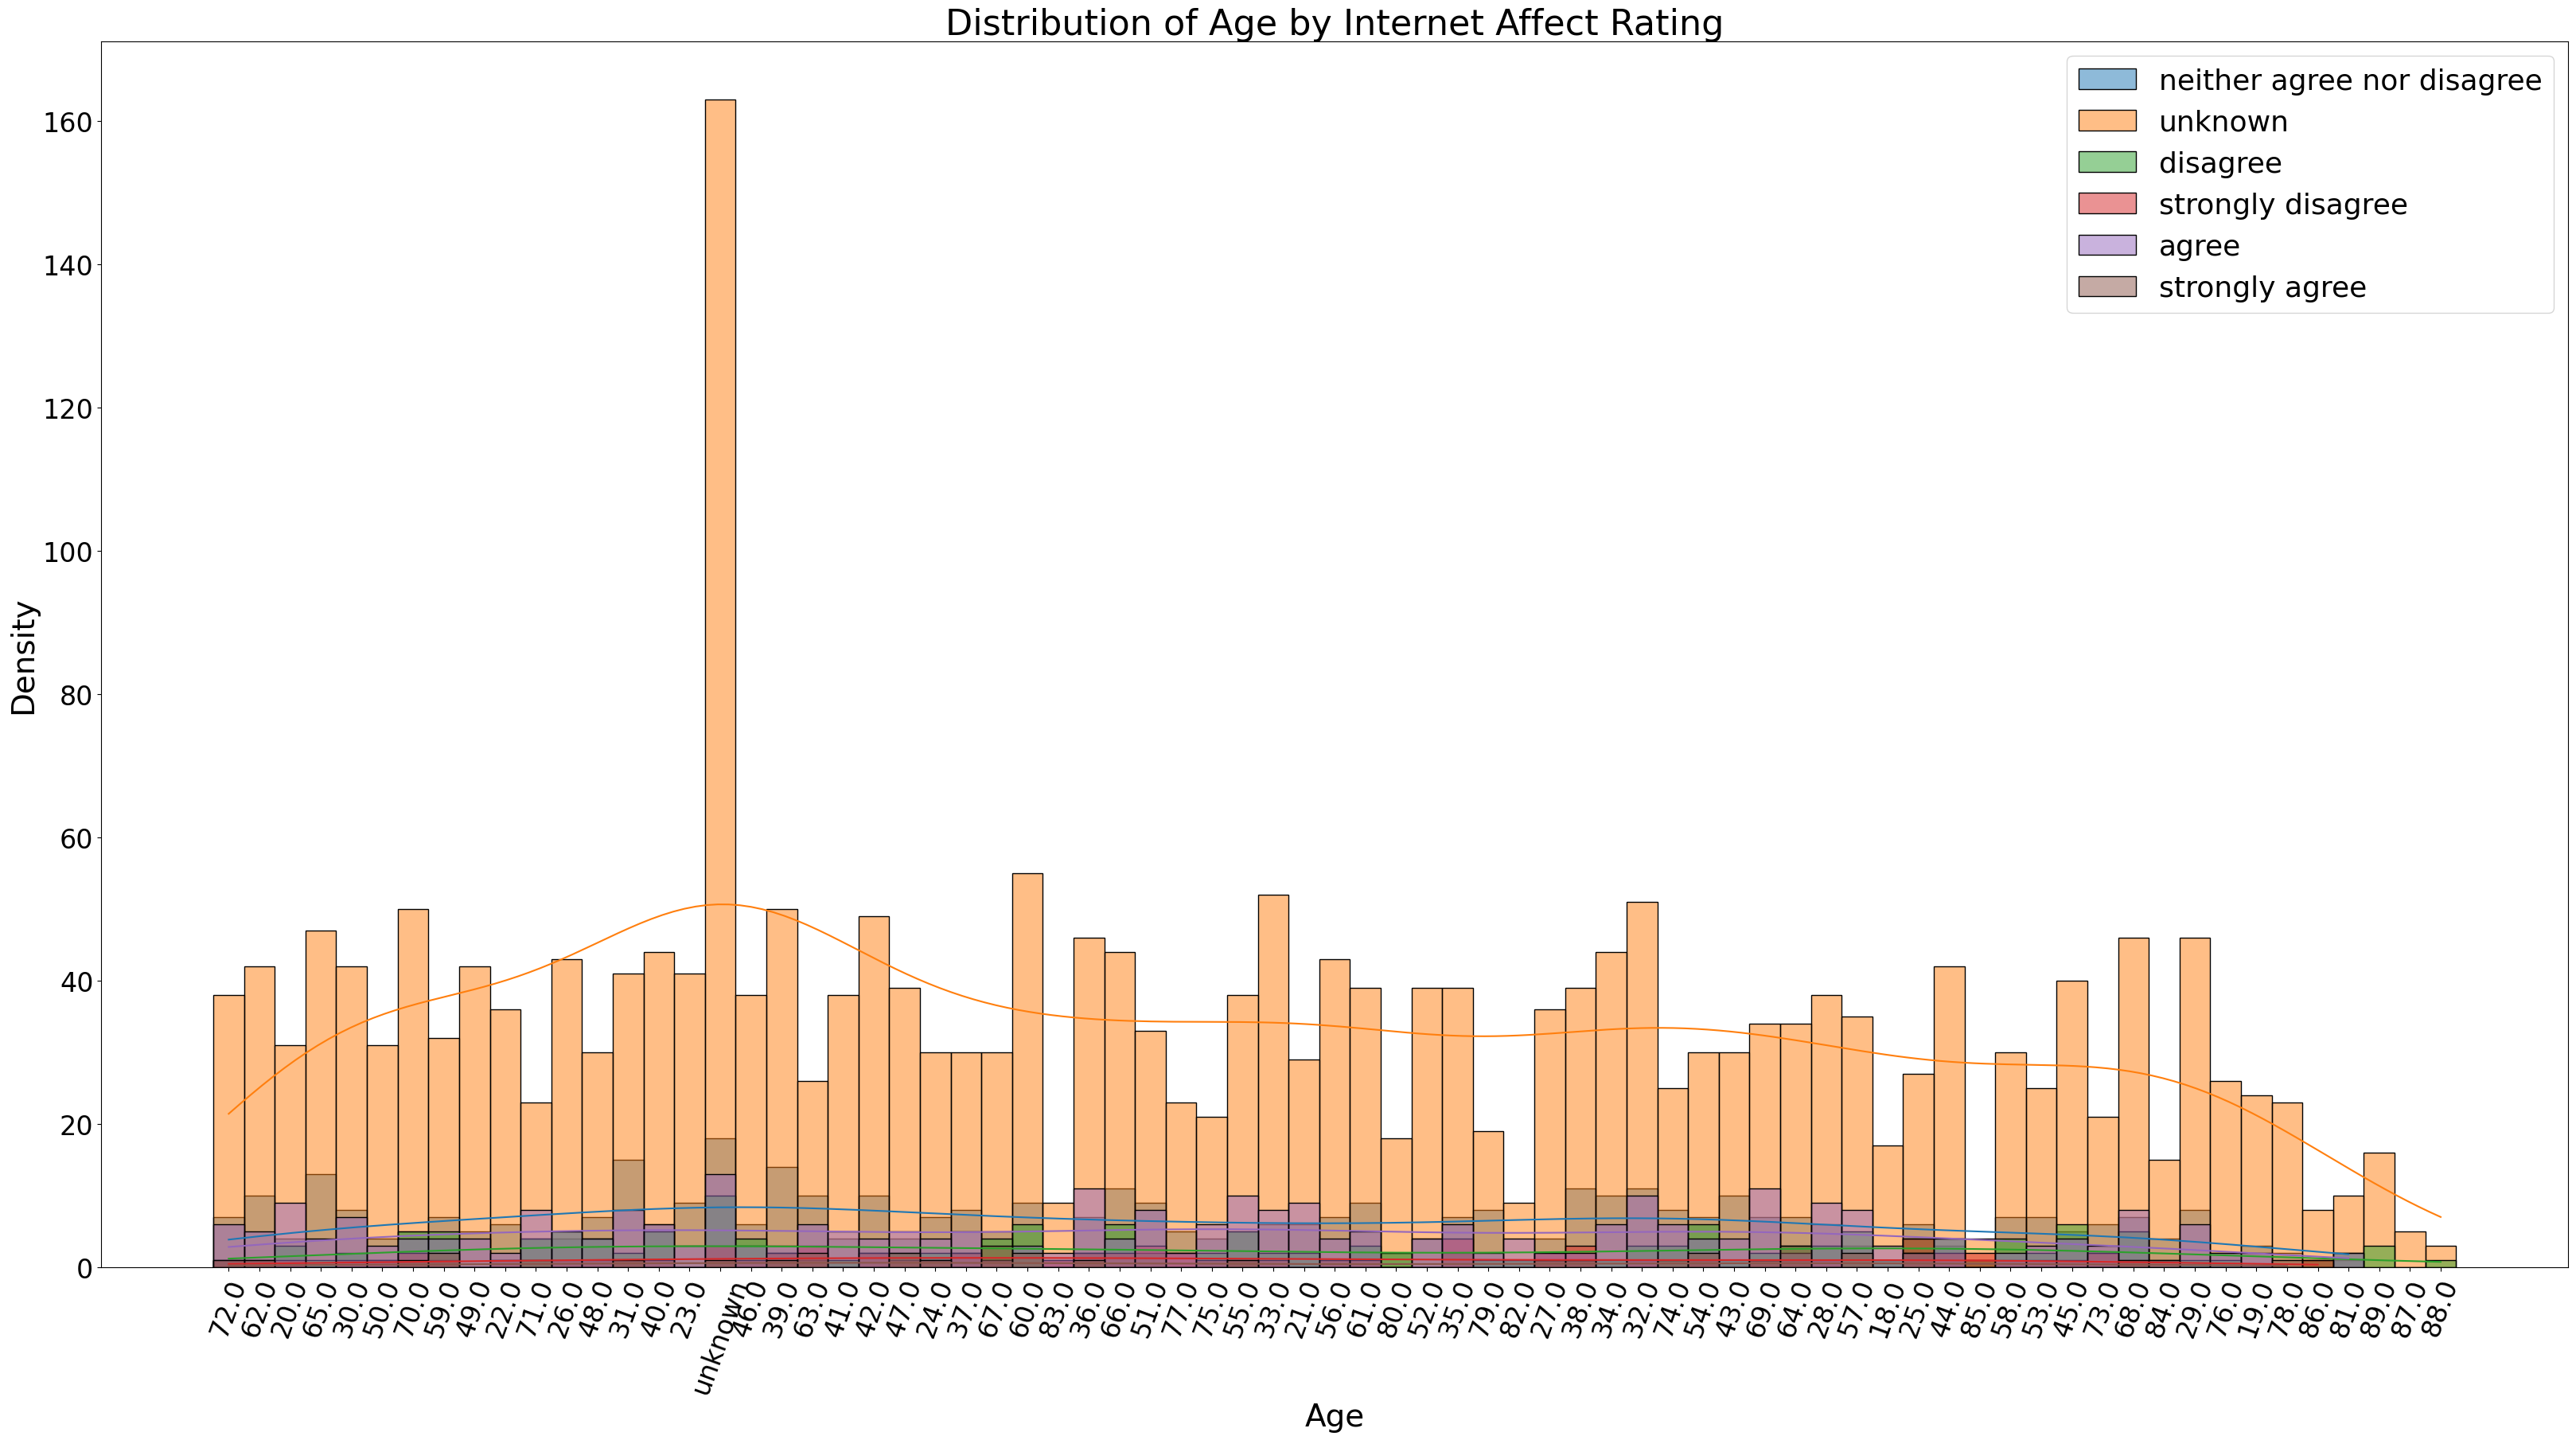

In [64]:
#NOTE: DEALING WITH INTERNET AFFECT RATING RN
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40,20))
for rating in df['internet_affect_rating'].unique():
    sns.histplot(df[df['internet_affect_rating'] == rating]['age'], label=rating, kde=True)

plt.title('Distribution of Age by Internet Affect Rating', fontsize=32)
plt.xlabel('Age', fontsize=28)
plt.ylabel('Density', fontsize=28)
plt.xticks(fontsize=24, rotation=70) 
plt.yticks(fontsize=24)
plt.legend(fontsize=26)
plt.show()



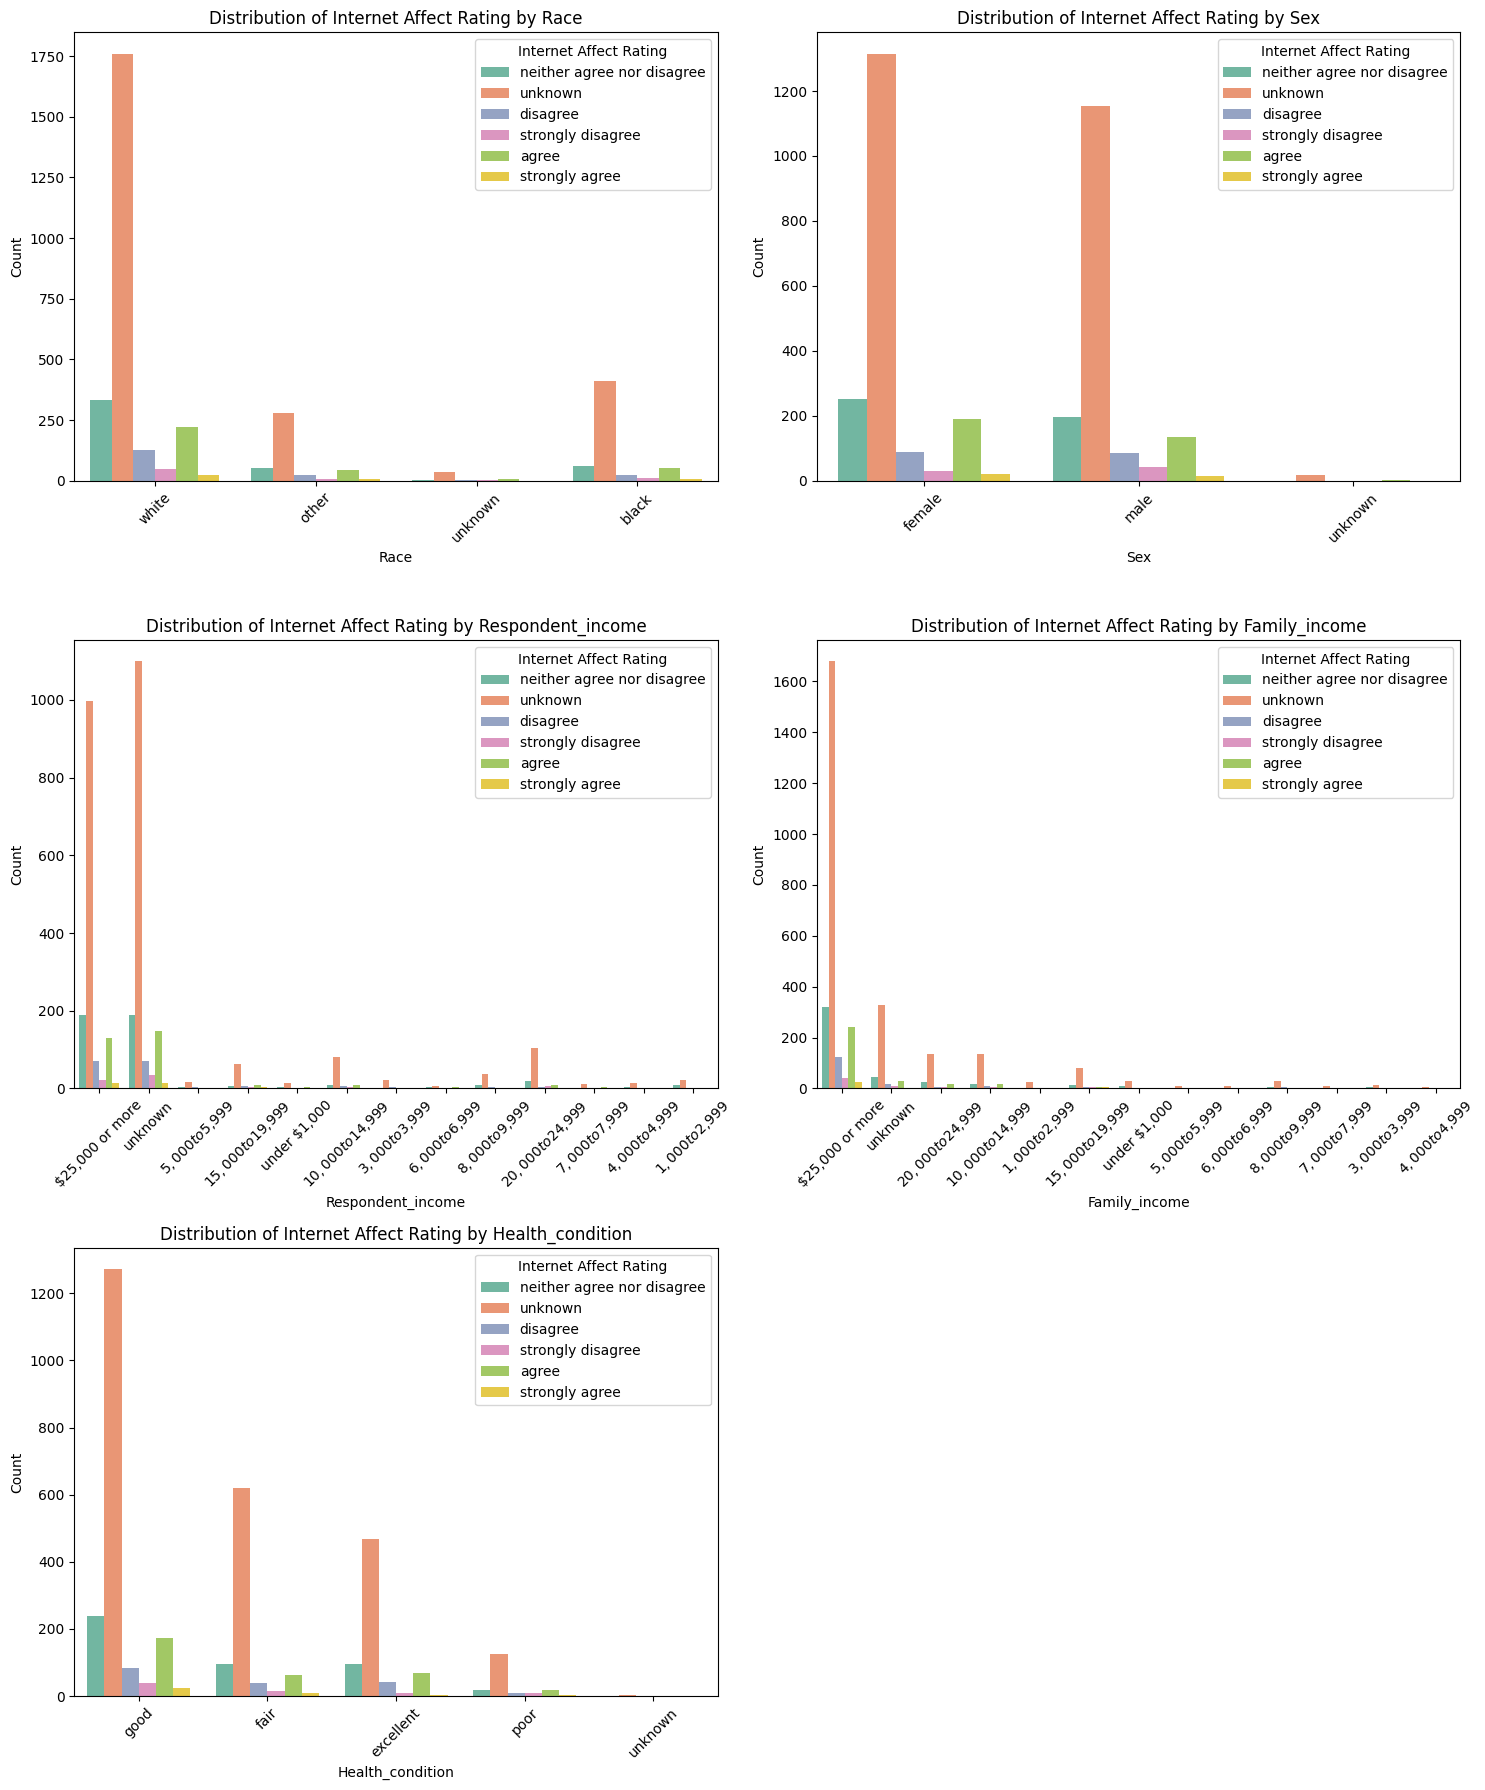

In [62]:
# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://seaborn.pydata.org/tutorial/function_overview.html
categorical_columns = ['race', 'sex', 'respondent_income', 'family_income', 'health_condition']

n = len(categorical_columns)
n_cols = 2  
n_rows = (n + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*6))
axes = axes.ravel()
# https://stackoverflow.com/questions/56605113/how-to-set-x-axis-ticklabels-in-a-seaborn-plot
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue='internet_affect_rating', palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of Internet Affect Rating by {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Internet Affect Rating')

# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.delaxes.html
for j in range(i+1, n_cols*n_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


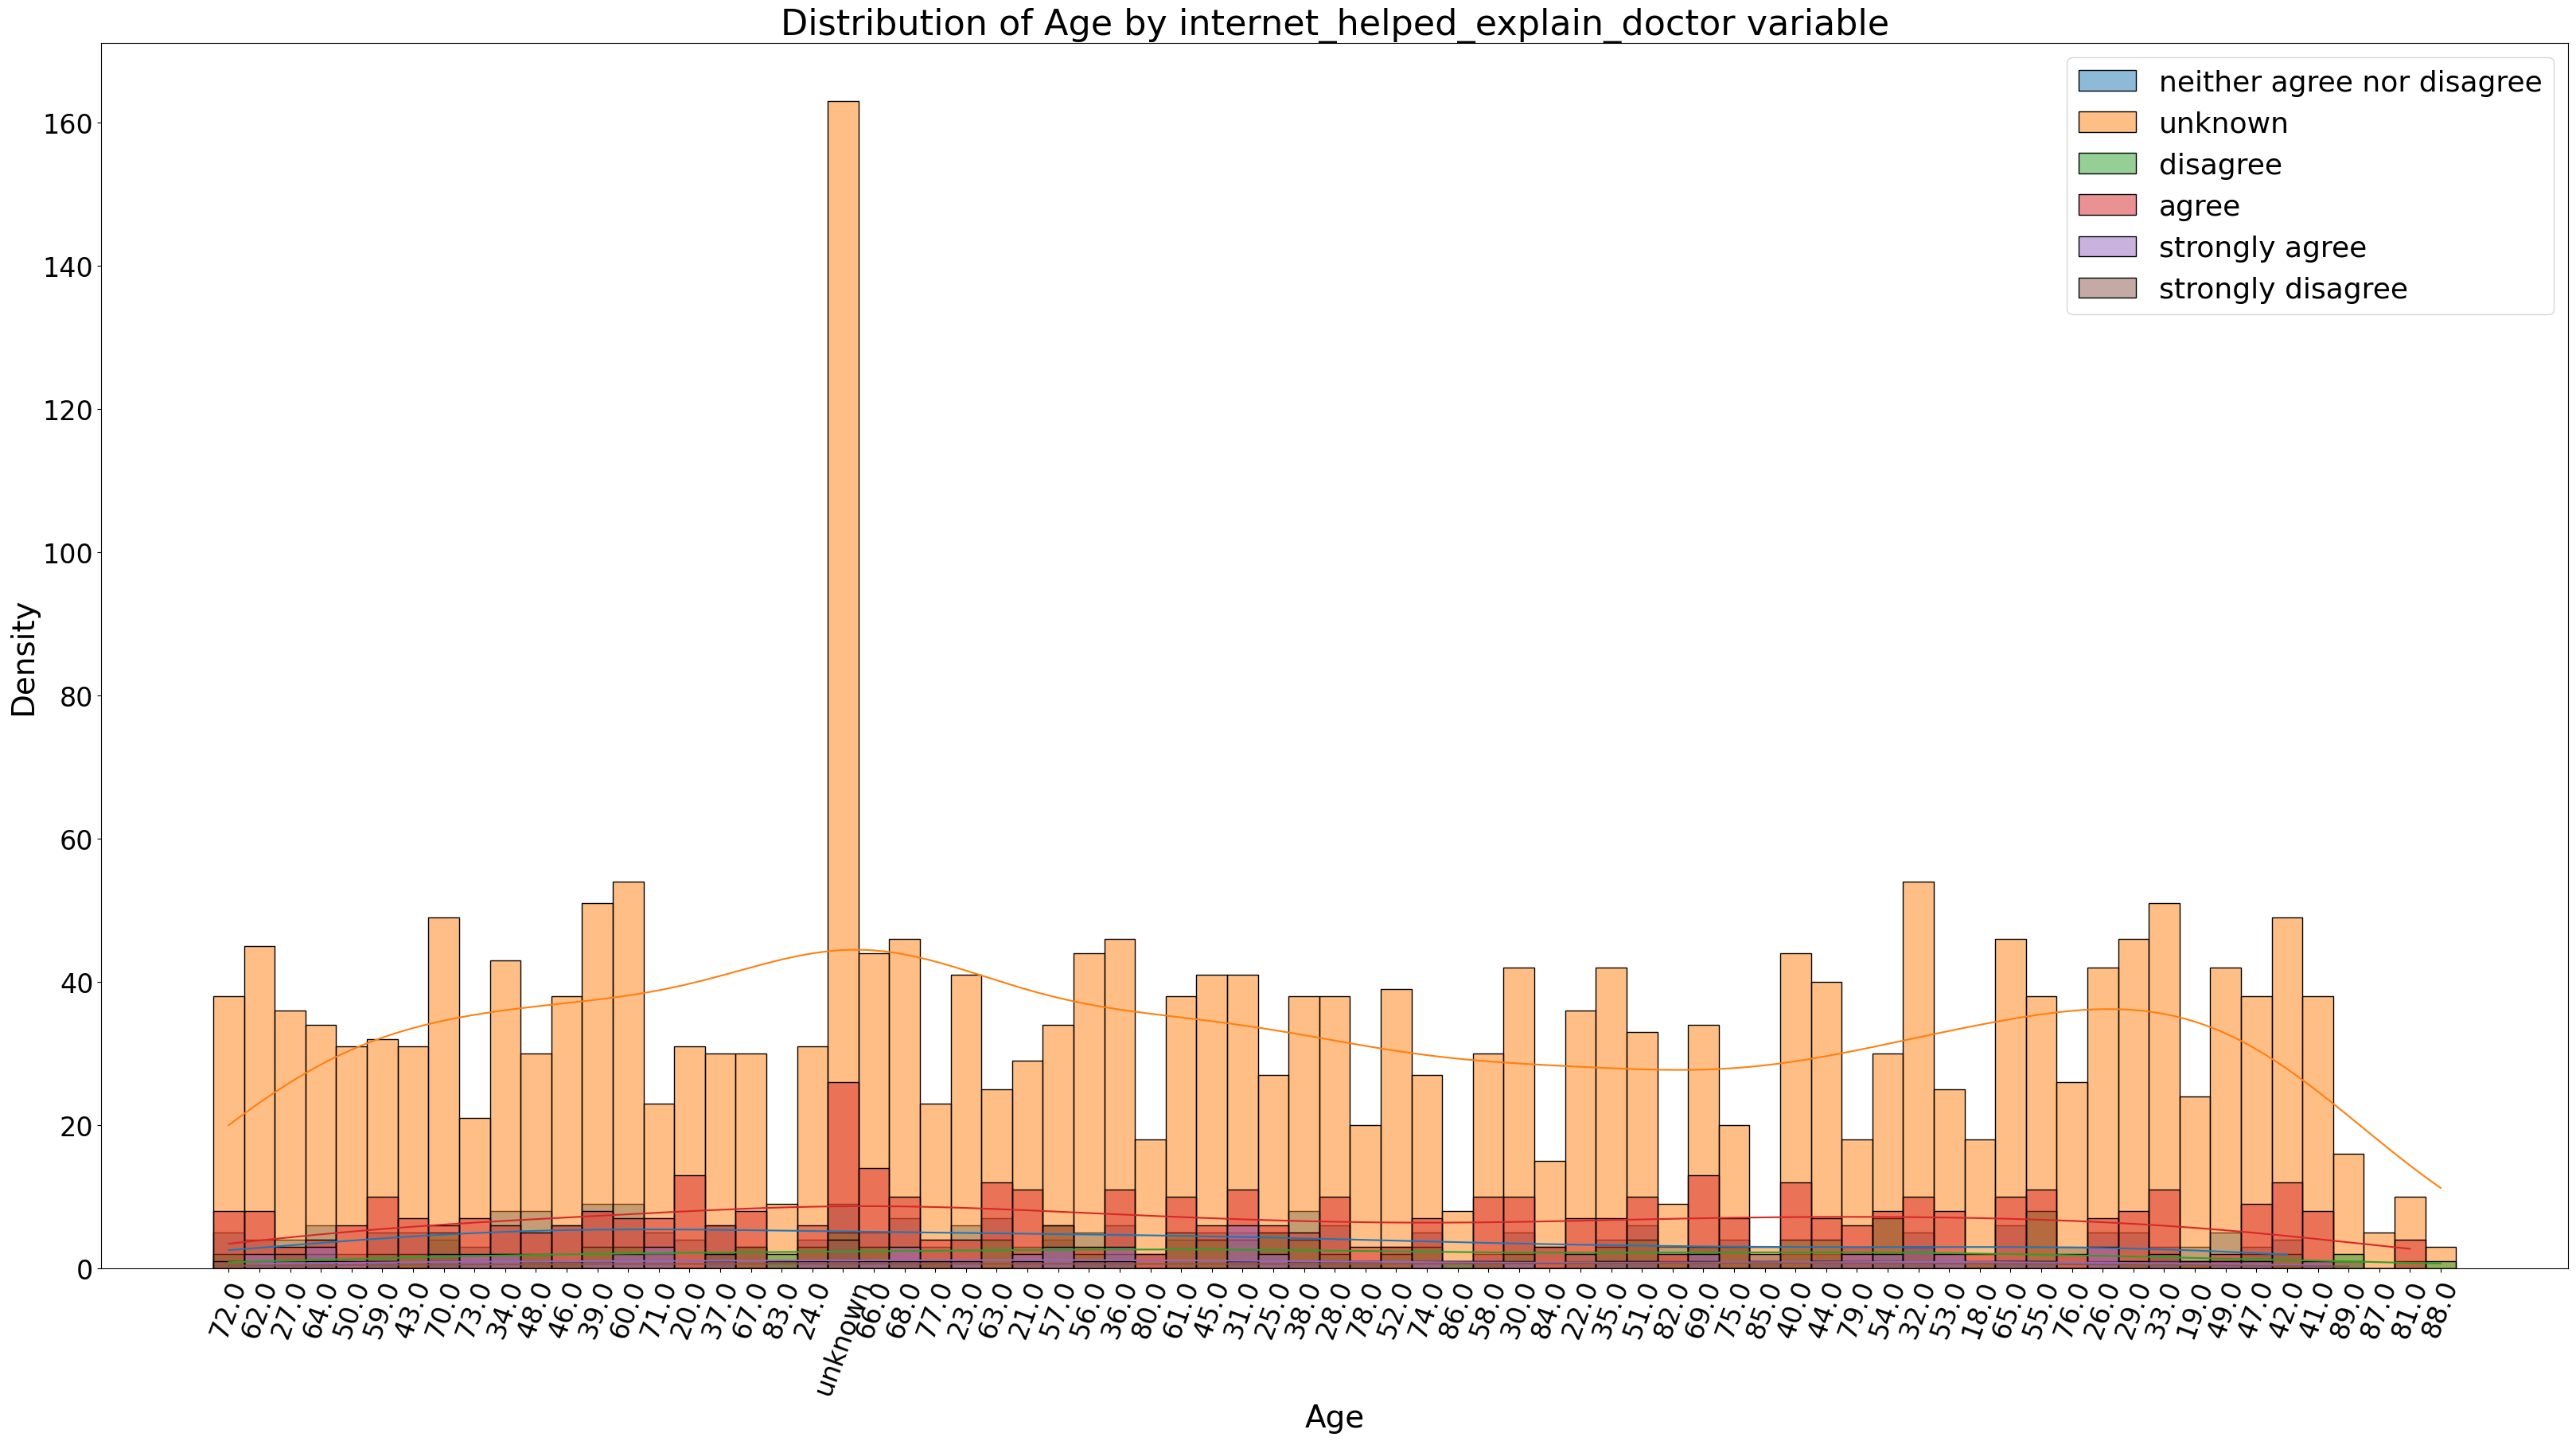

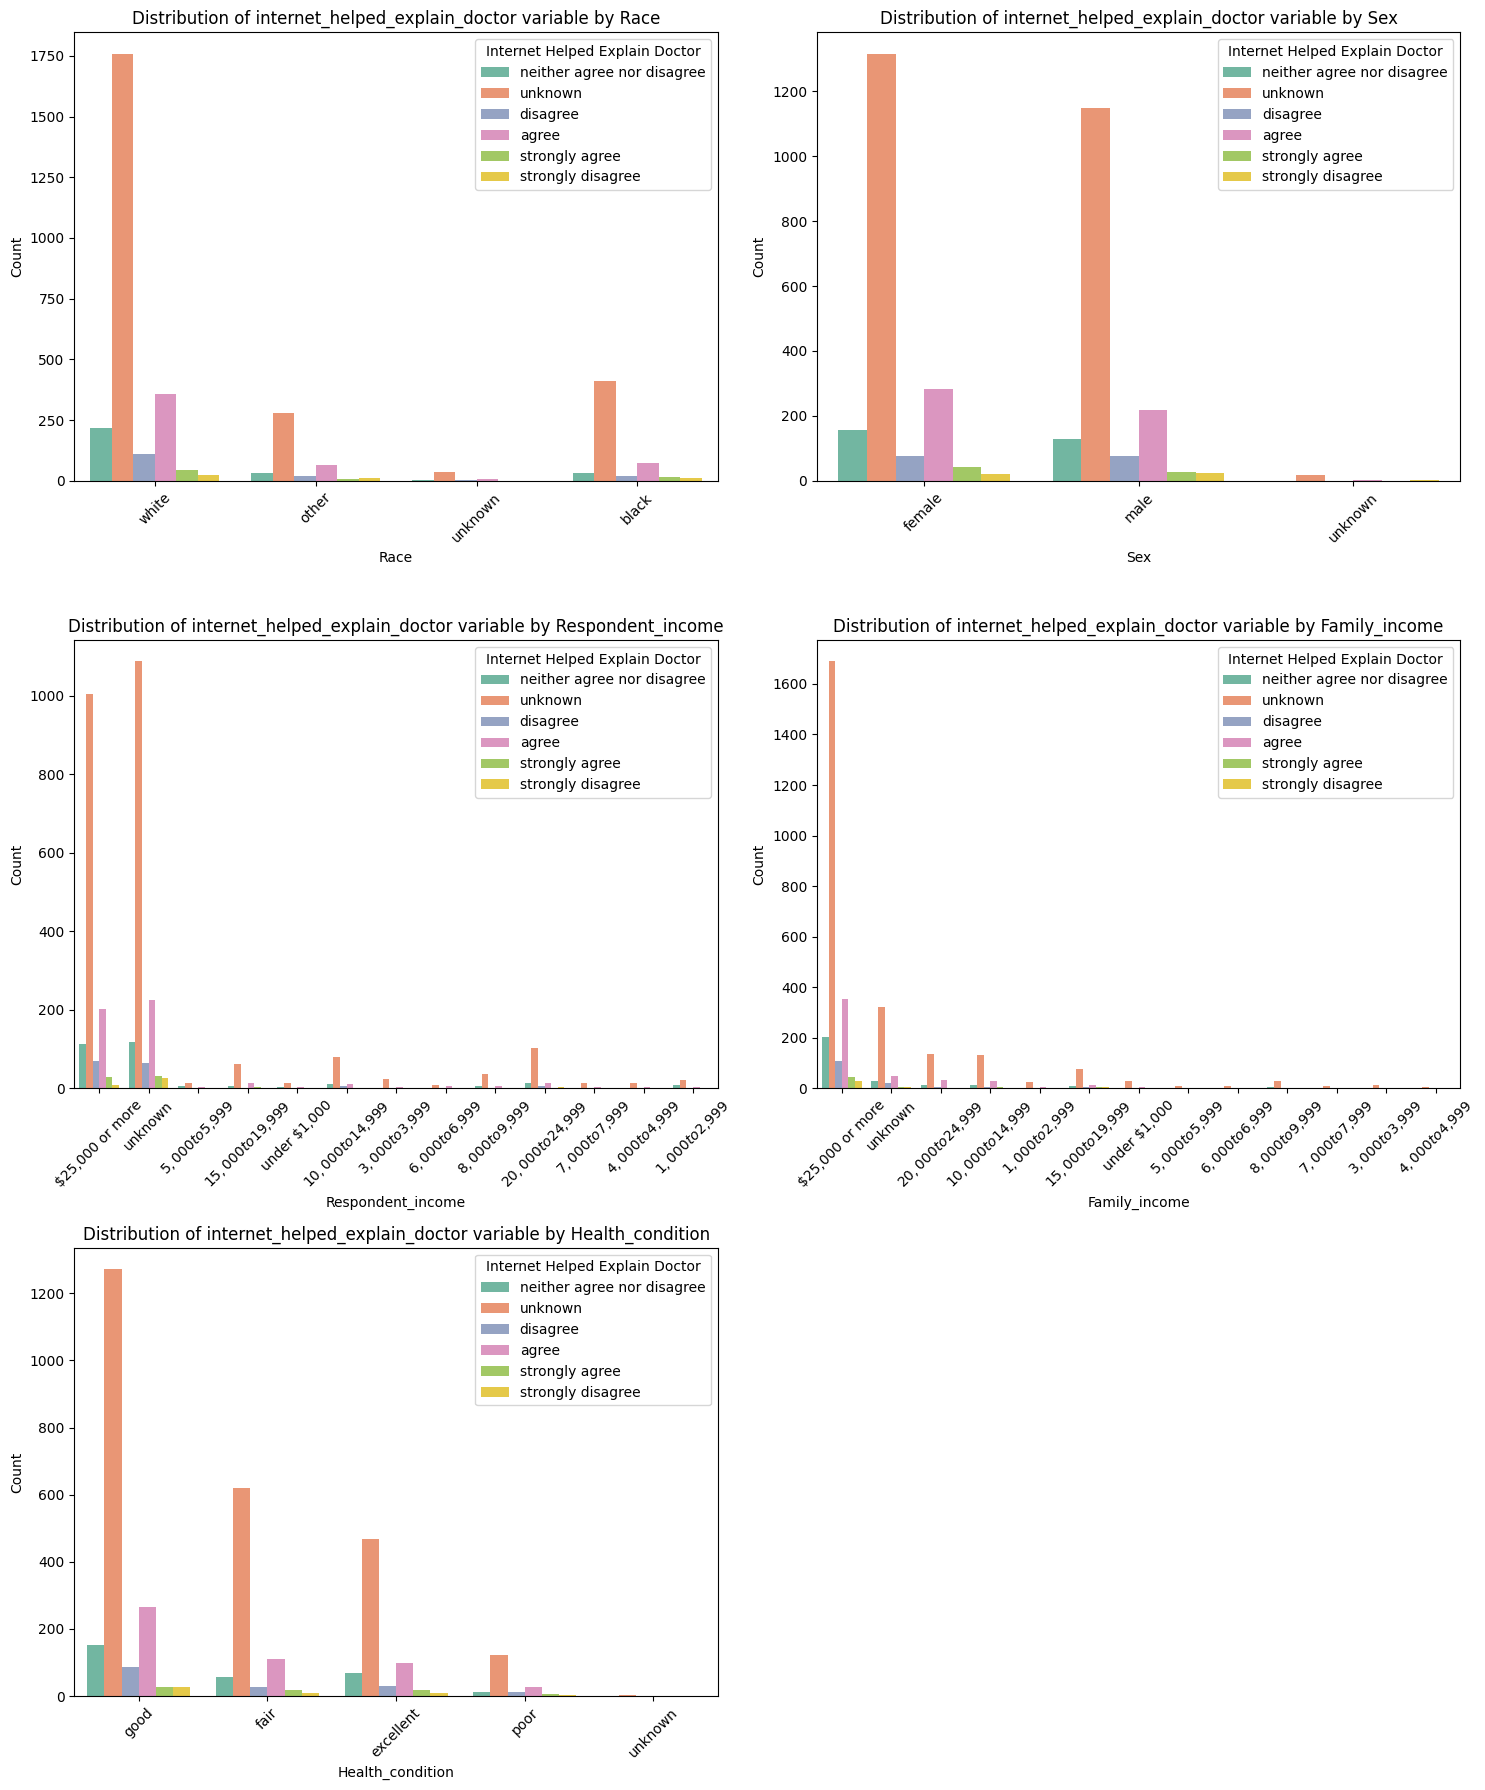

In [97]:
#NOTE: FOR THE internet_helped_explain_doctor variable
plt.figure(figsize=(40,20))
for rating in df['internet_helped_explain_doctor'].unique():
    sns.histplot(df[df['internet_helped_explain_doctor'] == rating]['age'], label=rating, kde=True)

plt.title('Distribution of Age by internet_helped_explain_doctor variable', fontsize=32)
plt.xlabel('Age', fontsize=28)
plt.ylabel('Density', fontsize=28)
plt.xticks(fontsize=24, rotation=70) 
plt.yticks(fontsize=24)
plt.legend(fontsize=26)
plt.show()

n = len(categorical_columns)
n_cols = 2  
n_rows = (n + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*6))
axes = axes.ravel()
# https://stackoverflow.com/questions/56605113/how-to-set-x-axis-ticklabels-in-a-seaborn-plot
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue='internet_helped_explain_doctor', palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of internet_helped_explain_doctor variable by {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Internet Helped Explain Doctor')

# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.delaxes.html
for j in range(i+1, n_cols*n_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


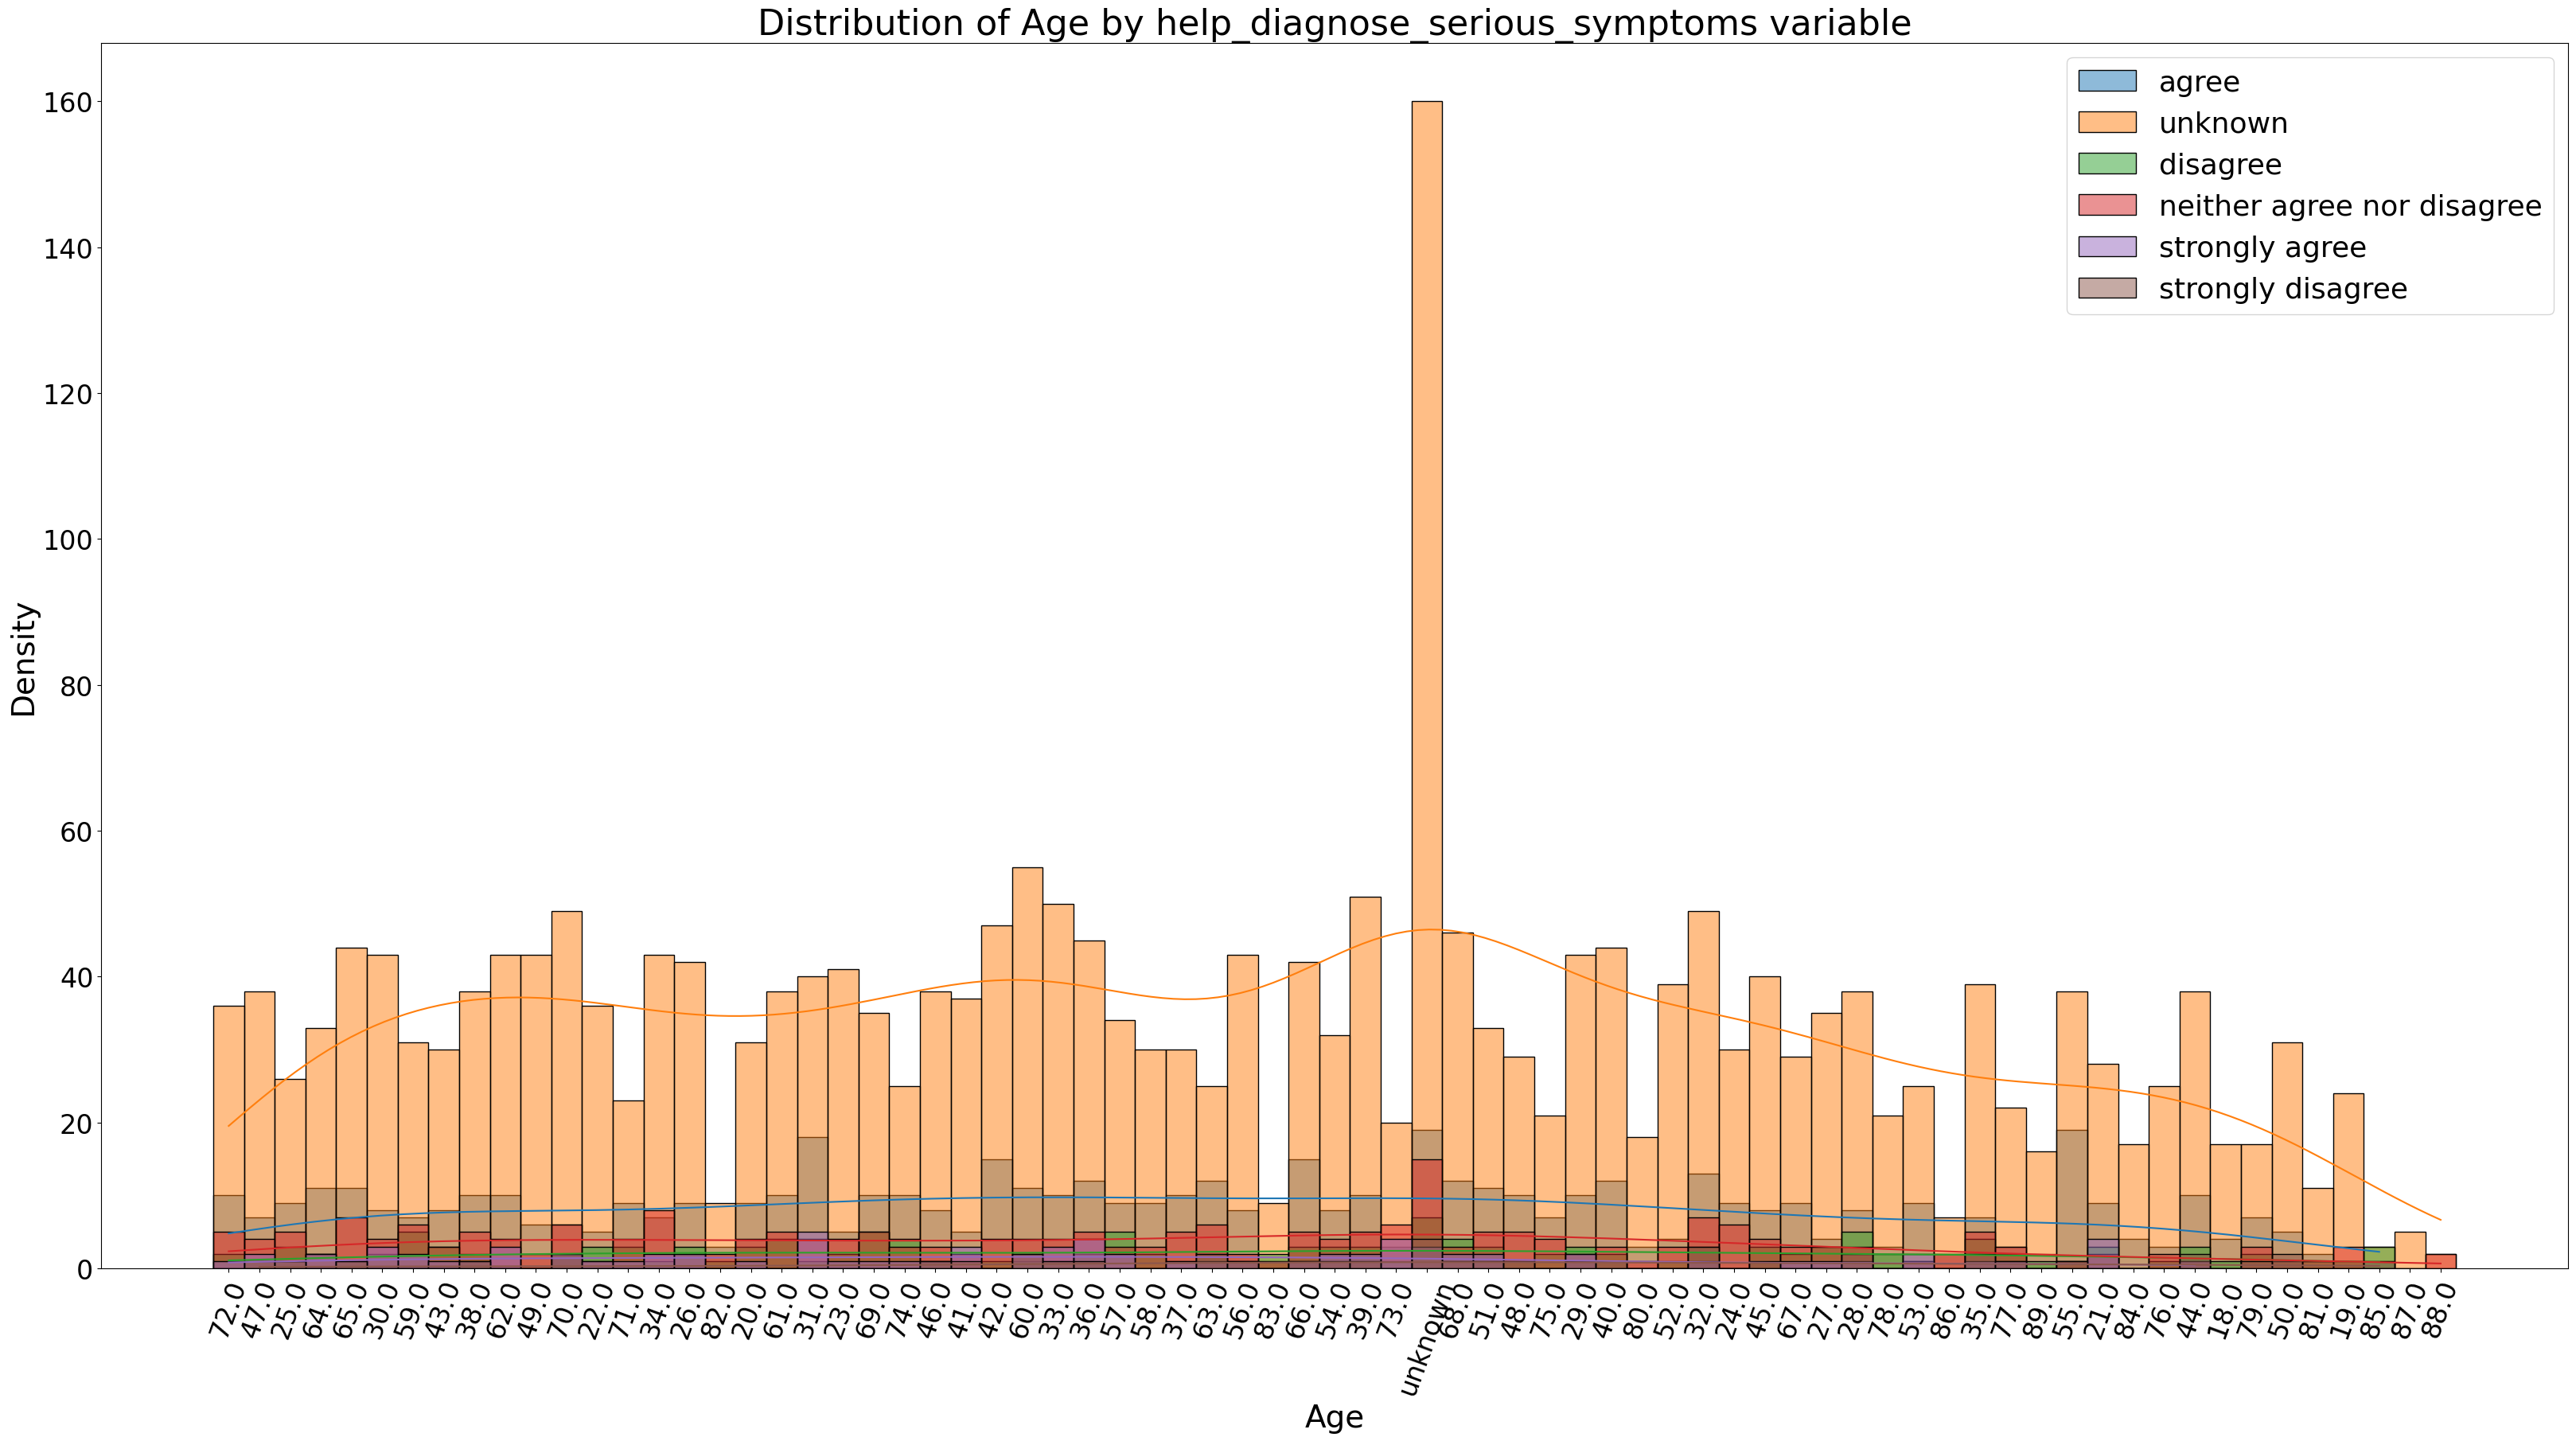

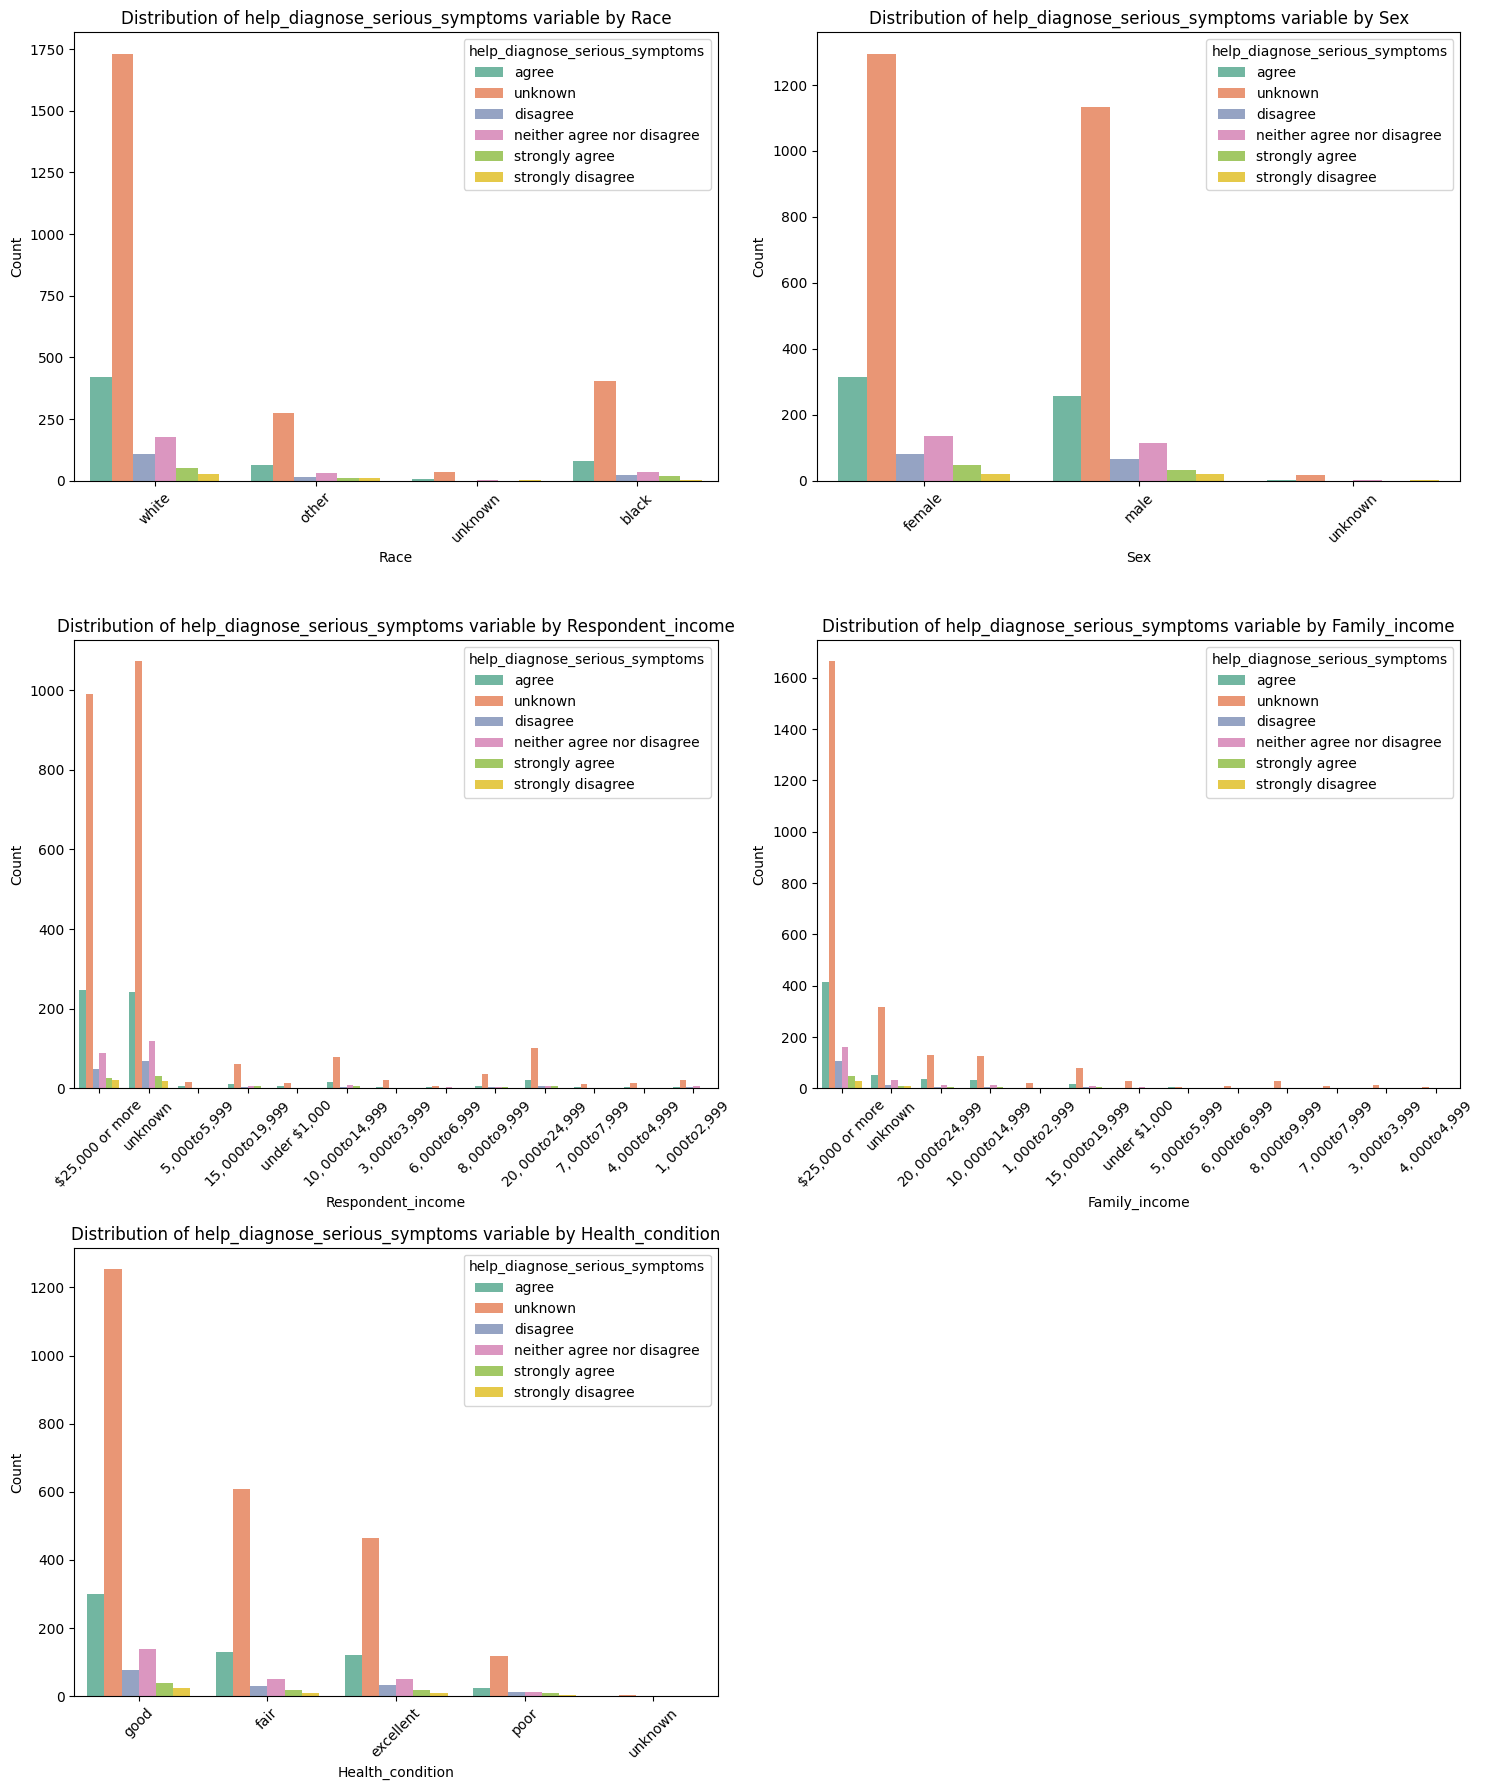

In [99]:
#NOTE: FOR THE helped_diagnose_serious_symptoms variable
plt.figure(figsize=(40,20))
for rating in df['help_diagnose_serious_symptoms'].unique():
    sns.histplot(df[df['help_diagnose_serious_symptoms'] == rating]['age'], label=rating, kde=True)

plt.title('Distribution of Age by help_diagnose_serious_symptoms variable', fontsize=32)
plt.xlabel('Age', fontsize=28)
plt.ylabel('Density', fontsize=28)
plt.xticks(fontsize=24, rotation=70) 
plt.yticks(fontsize=24)
plt.legend(fontsize=26)
plt.show()

n = len(categorical_columns)
n_cols = 2  
n_rows = (n + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*6))
axes = axes.ravel()
# https://stackoverflow.com/questions/56605113/how-to-set-x-axis-ticklabels-in-a-seaborn-plot
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue='help_diagnose_serious_symptoms', palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of help_diagnose_serious_symptoms variable by {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='help_diagnose_serious_symptoms')

# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.delaxes.html
for j in range(i+1, n_cols*n_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


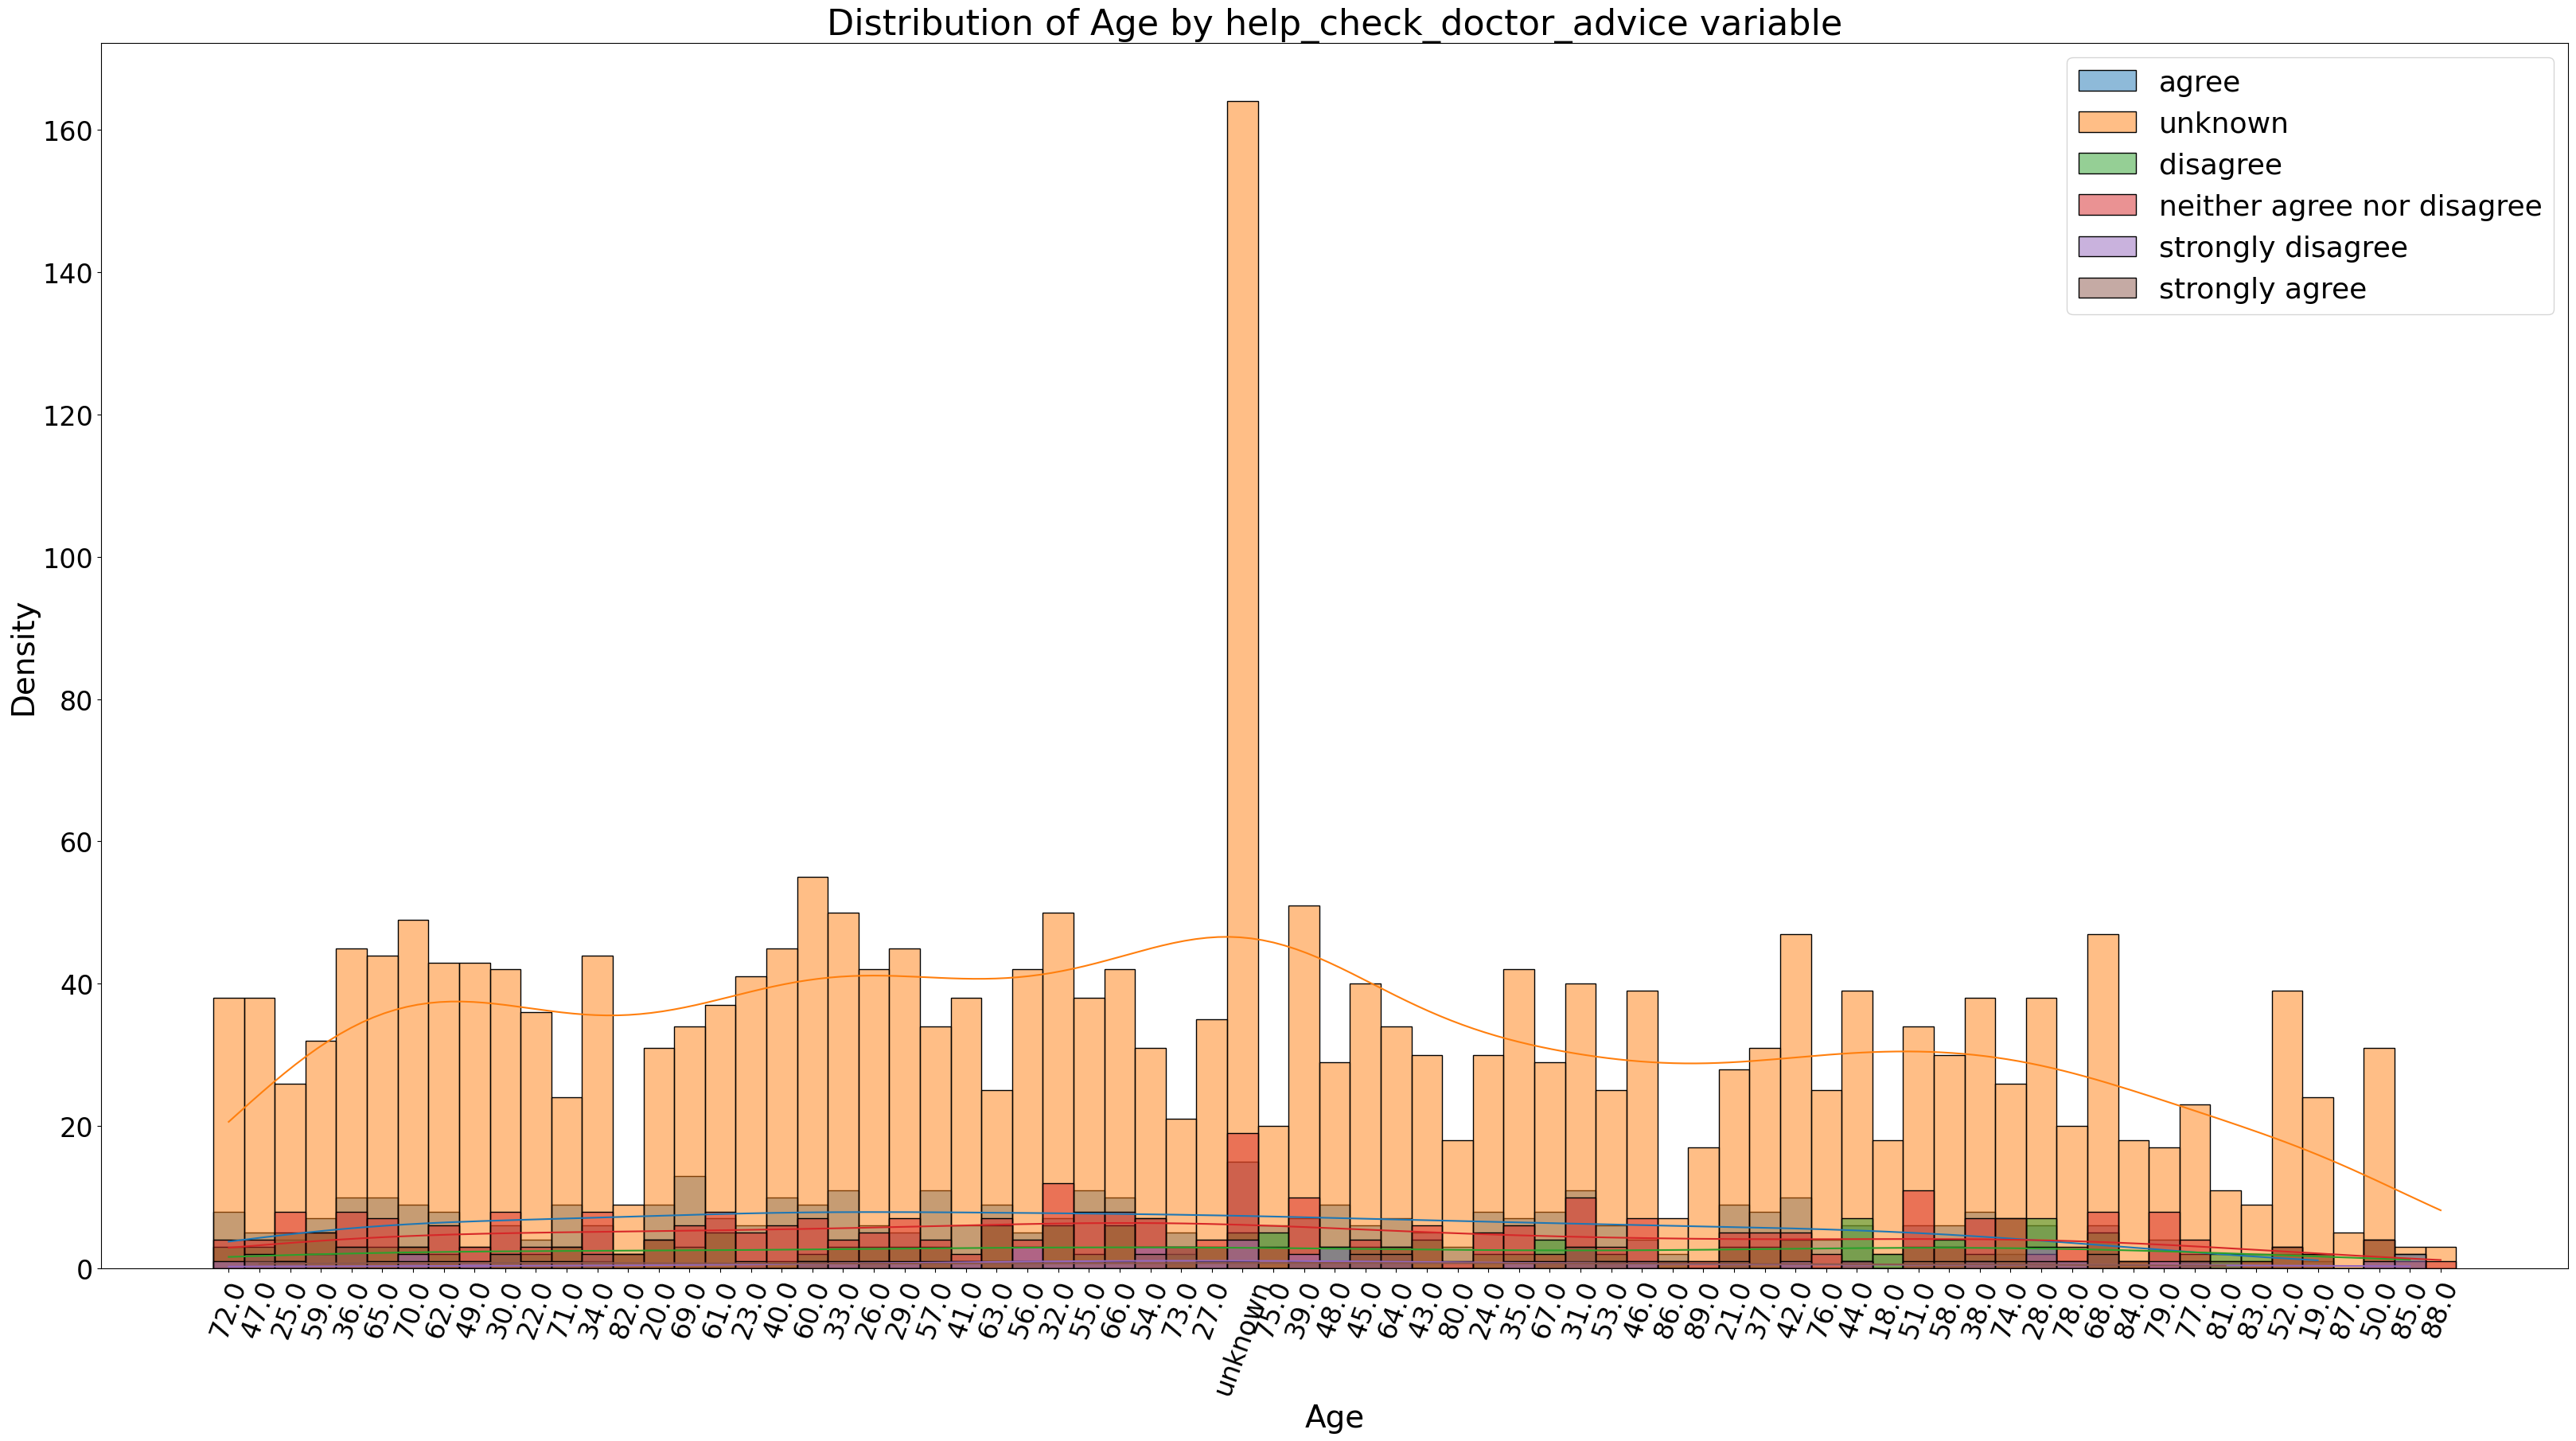

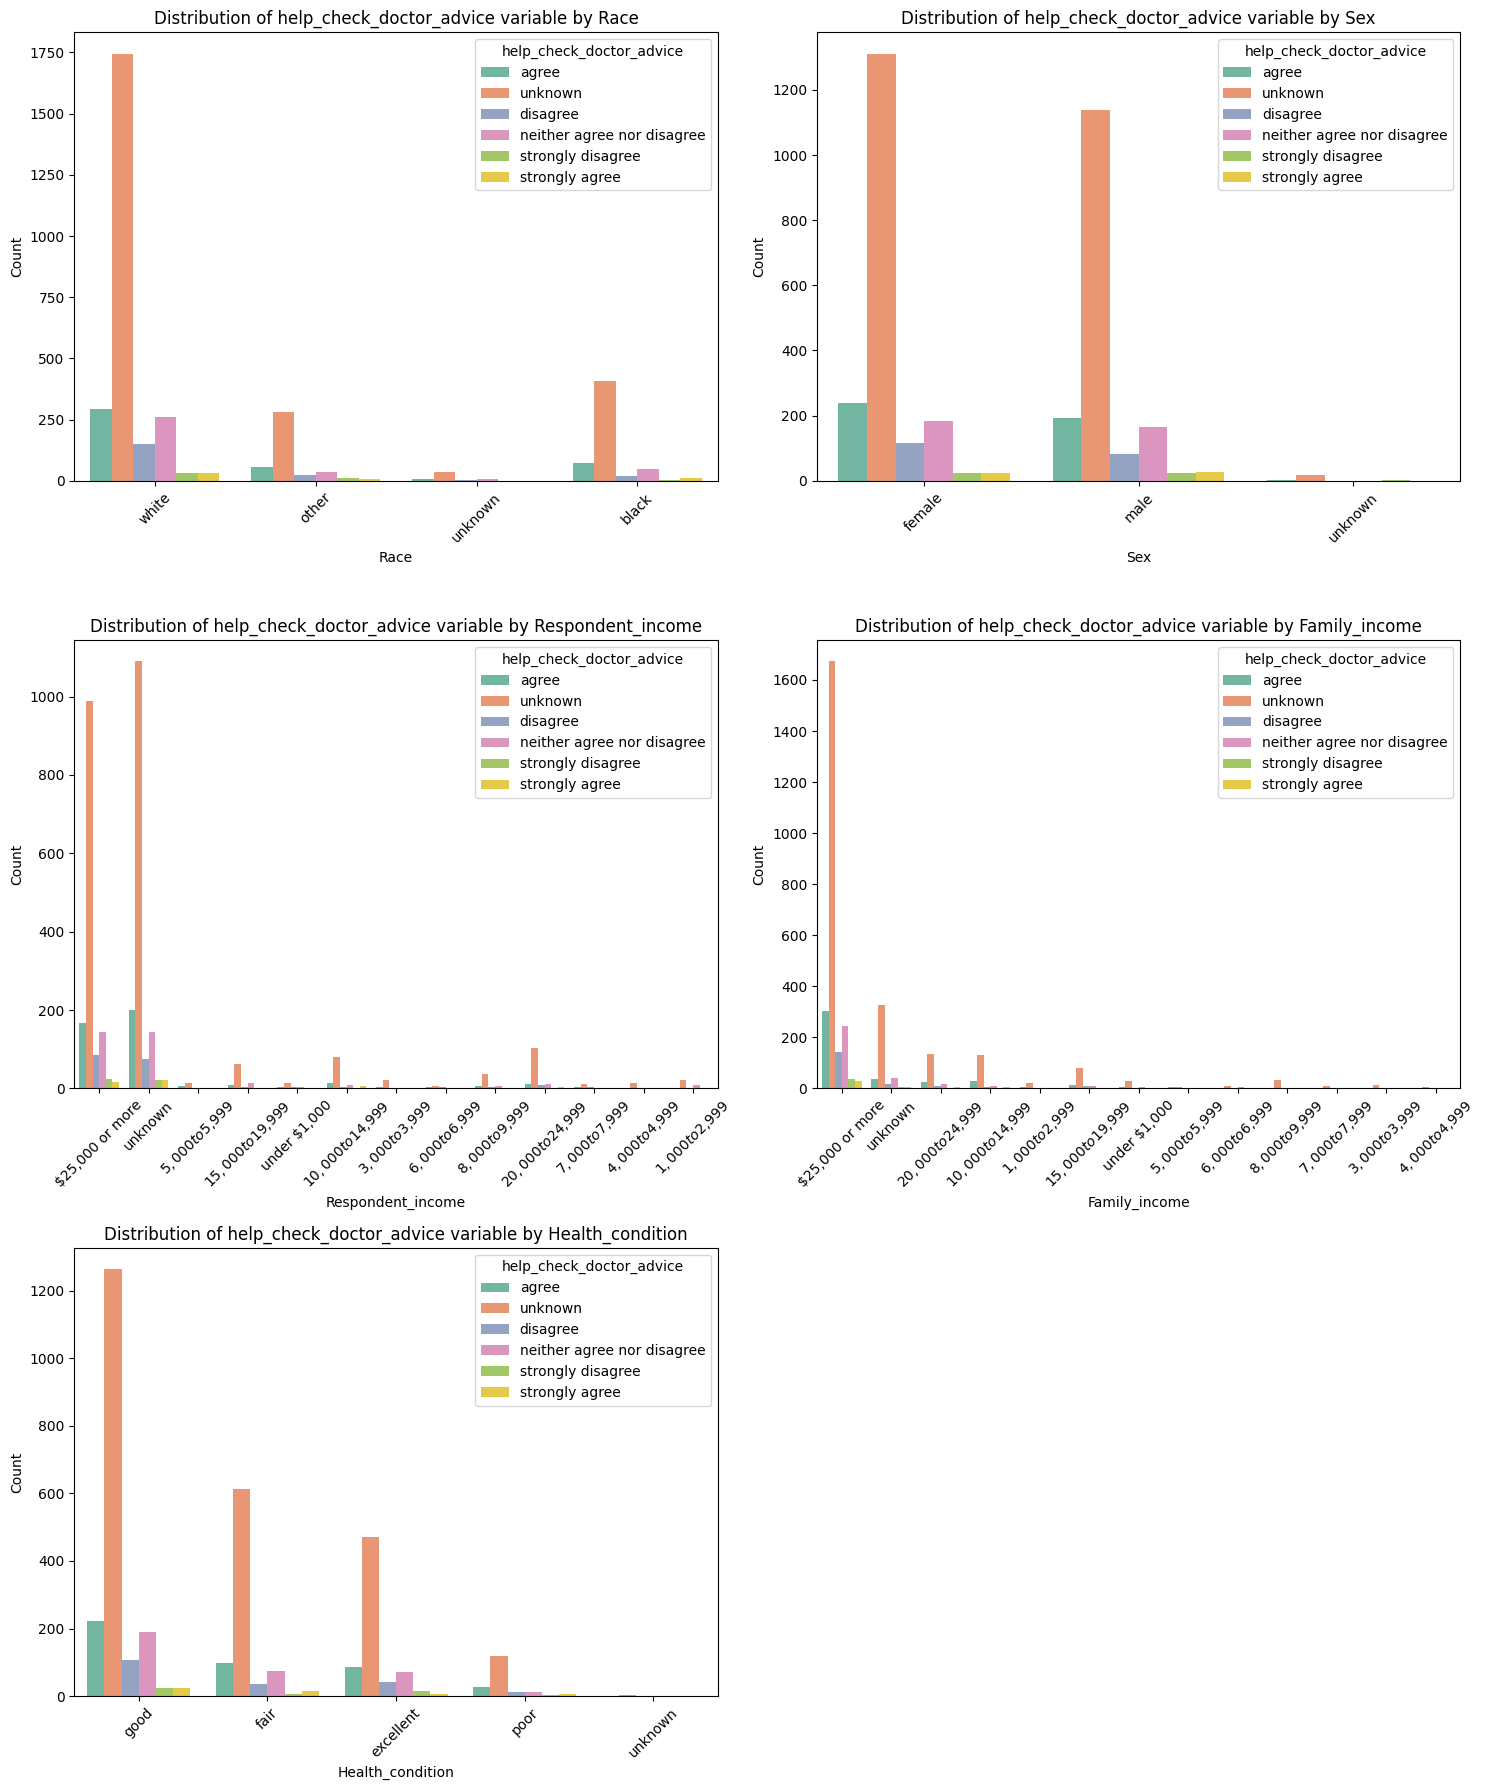

In [100]:
#NOTE: FOR THE help_check_doctor_advice variable
plt.figure(figsize=(40,20))
for rating in df['help_check_doctor_advice'].unique():
    sns.histplot(df[df['help_check_doctor_advice'] == rating]['age'], label=rating, kde=True)

plt.title('Distribution of Age by help_check_doctor_advice variable', fontsize=32)
plt.xlabel('Age', fontsize=28)
plt.ylabel('Density', fontsize=28)
plt.xticks(fontsize=24, rotation=70) 
plt.yticks(fontsize=24)
plt.legend(fontsize=26)
plt.show()

n = len(categorical_columns)
n_cols = 2  
n_rows = (n + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*6))
axes = axes.ravel()
# https://stackoverflow.com/questions/56605113/how-to-set-x-axis-ticklabels-in-a-seaborn-plot
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue='help_check_doctor_advice', palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of help_check_doctor_advice variable by {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='help_check_doctor_advice')

# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.delaxes.html
for j in range(i+1, n_cols*n_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


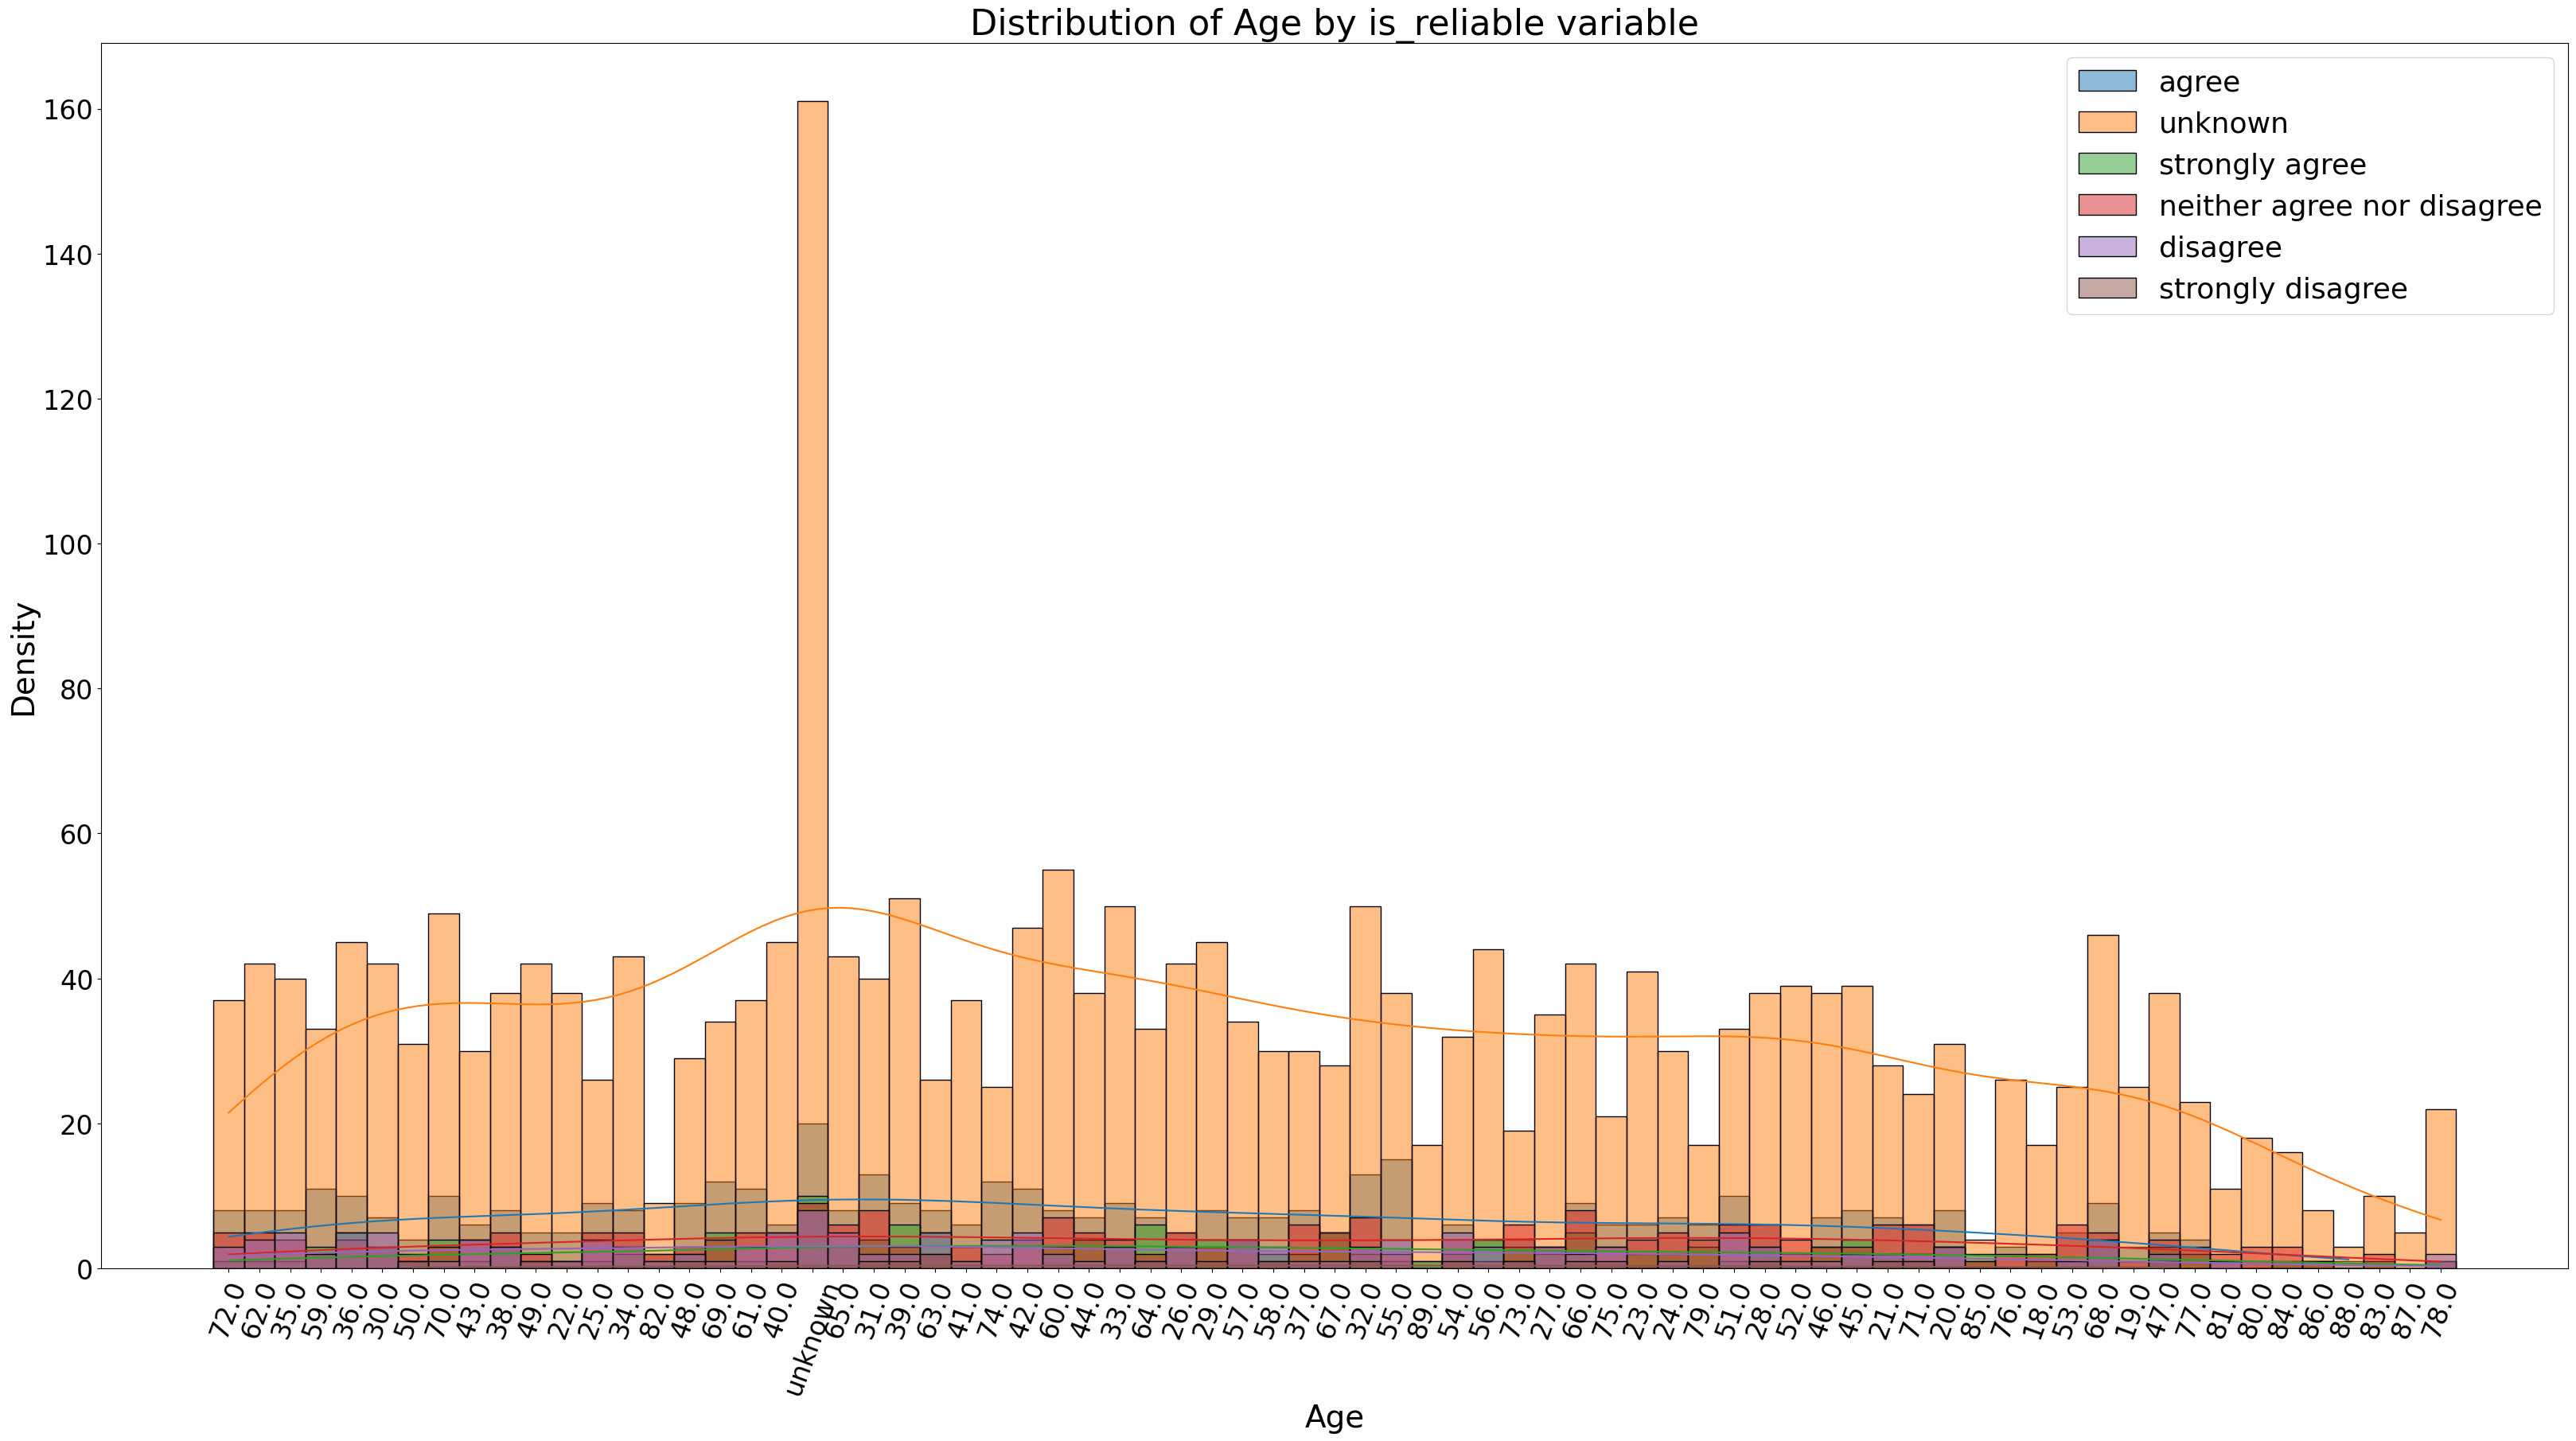

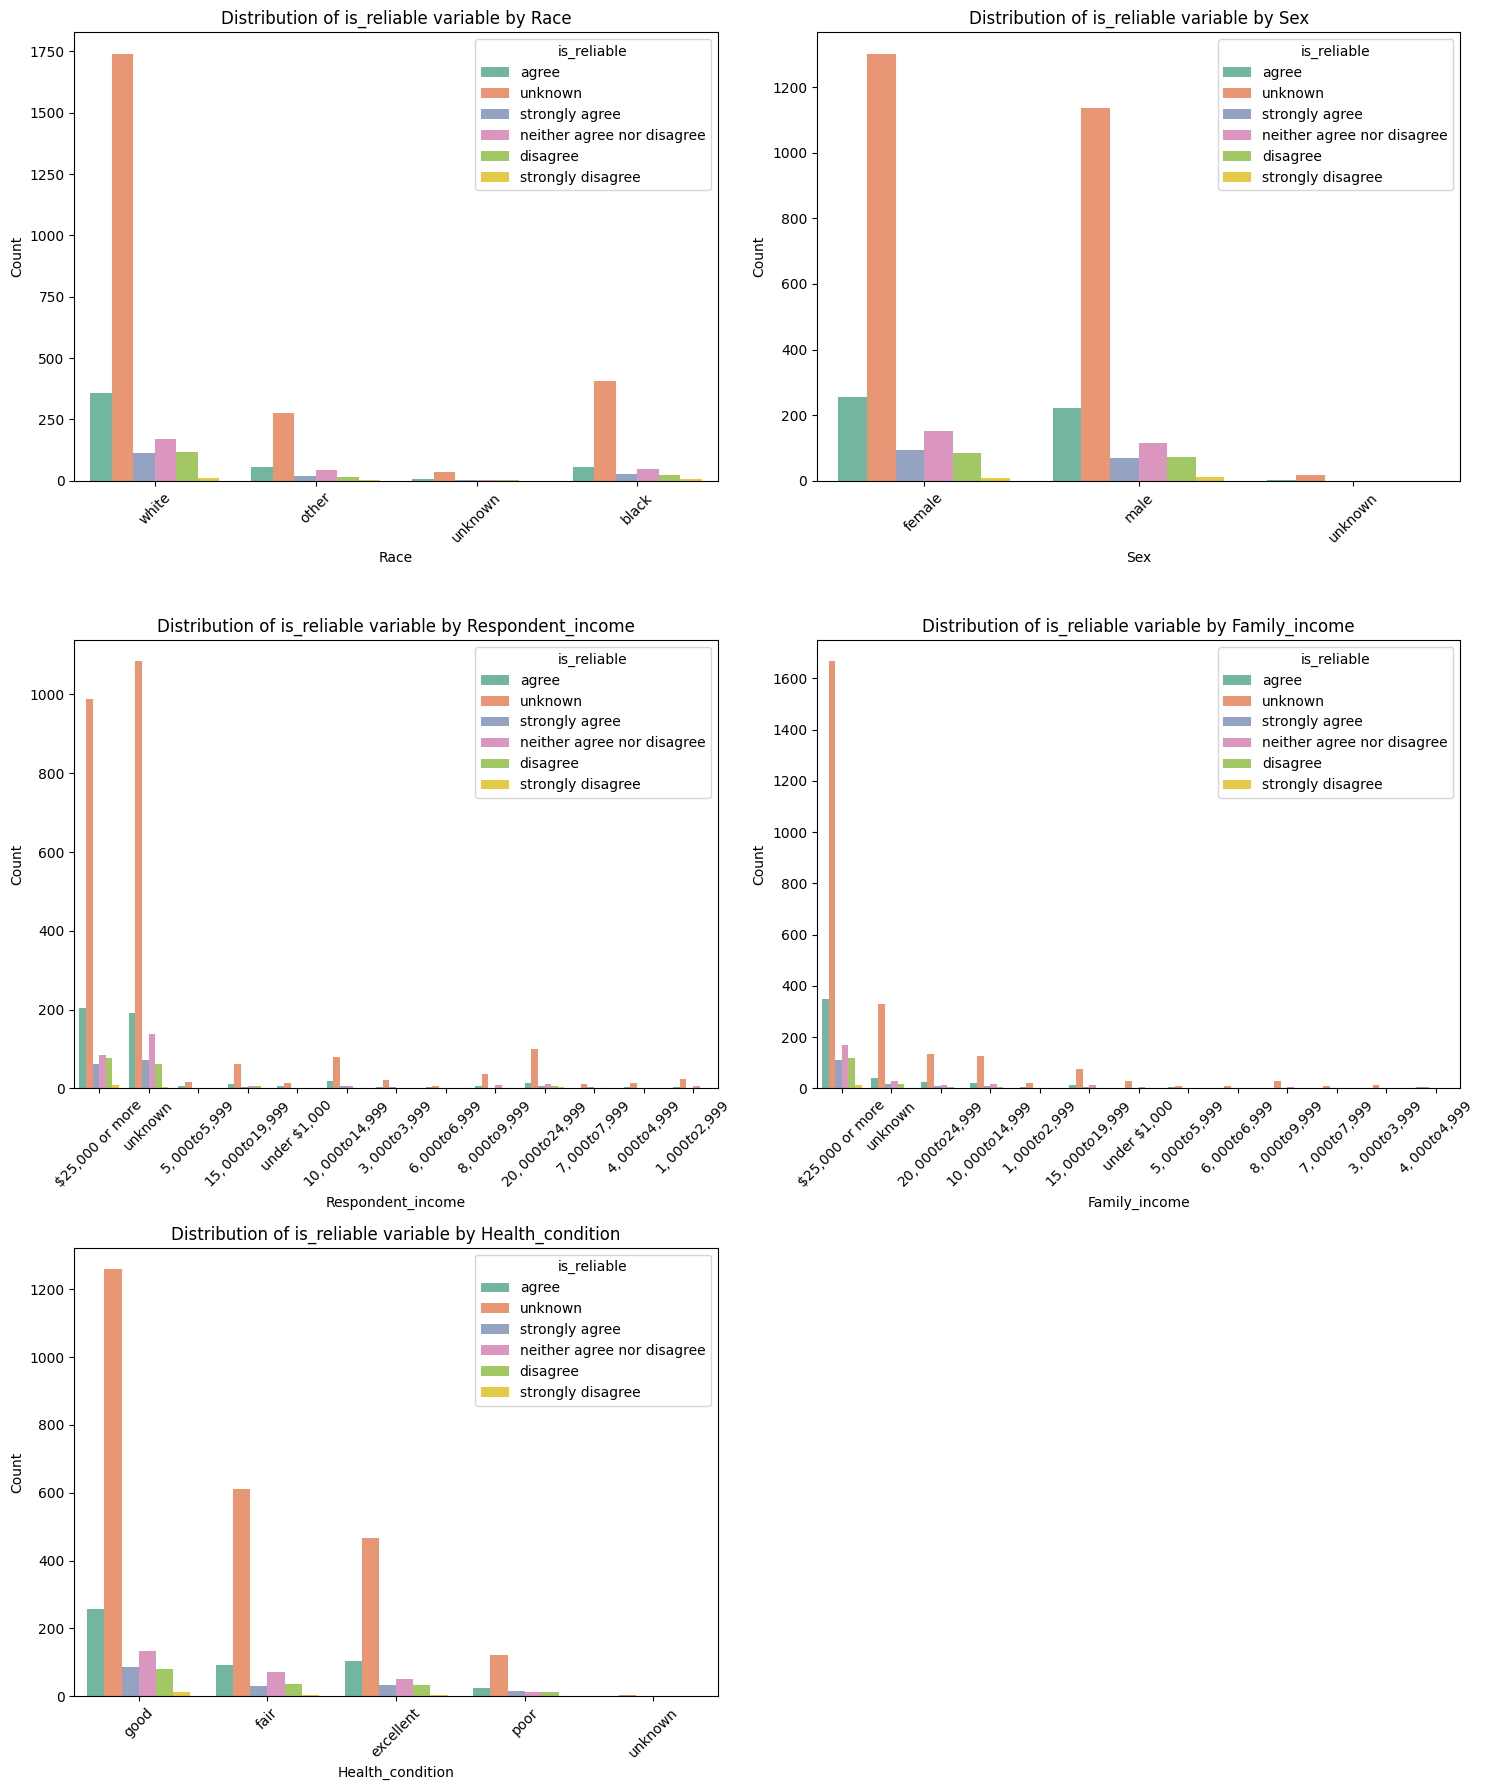

In [101]:
#NOTE: FOR THE is_reliable variable
plt.figure(figsize=(40,20))
for rating in df['is_reliable'].unique():
    sns.histplot(df[df['is_reliable'] == rating]['age'], label=rating, kde=True)

plt.title('Distribution of Age by is_reliable variable', fontsize=32)
plt.xlabel('Age', fontsize=28)
plt.ylabel('Density', fontsize=28)
plt.xticks(fontsize=24, rotation=70) 
plt.yticks(fontsize=24)
plt.legend(fontsize=26)
plt.show()

n = len(categorical_columns)
n_cols = 2  
n_rows = (n + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*6))
axes = axes.ravel()
# https://stackoverflow.com/questions/56605113/how-to-set-x-axis-ticklabels-in-a-seaborn-plot
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue='is_reliable', palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of is_reliable variable by {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='is_reliable')

# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.delaxes.html
for j in range(i+1, n_cols*n_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
